### Importing Library and Dataset

In [1]:
import  pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sma

In [2]:
path = 'E:/Datasets'
os.chdir(path)
os.getcwd()

'E:\\Datasets'

In [3]:
df =  pd.read_csv('2019-Oct.csv')

# EDA - Entire Data

### Features and its Datatypes

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


### Data Dictionary

* **event_time** :Time when event happened at (in UTC).  
* **event_type** :	Only one kind of event: purchase.  
* **product_id** :	ID of a product.  
* **category_id** :	Product's category ID.  
* **category_code** :	Product's category taxonomy (code name).  
* **brand** : brand name of each product.    
* **price** : 	Float price of a products.    
* **user_id** : Permanent user ID.  

* **user_session** :	Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

Events can be one of the following types:  

    **view** - a user viewed a product  
    **cart** - a user added a product to shopping cart  
    **purchase** - a user purchased a product  

Multiple purchases per session : A session can have multiple purchase events,since it's a single order.



### Converting Datatypes 

Changing the Date column into Datatime format for further Data Manipulation

In [6]:

df.event_time = pd.to_datetime(df.event_time)

Changing the event_type column into Category to save memory.  
Id columns in the dataset are numeric hence changing them to Objects

In [7]:
df.event_type = df.event_type.astype('category')

df.product_id  = df.product_id.astype('object')
df.category_id = df.category_id.astype('object')
df.user_id = df.user_id.astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     object             
 3   category_id    object             
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        object             
 8   user_session   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 2.6+ GB


From the above ,we can see that we have 

    * 1 - numeric variable
    * 7 - categorical variable
    * 1 - date time variable   

## Checking for Missing values 

In [9]:
df.isnull().sum()/df.shape[0] * 100

event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    31.839818
brand            14.410502
price             0.000000
user_id           0.000000
user_session      0.000005
dtype: float64

In [10]:
pd.set_option('display.float_format',  '{:,}'.format)
df.describe()

,price
count,"42,448,764.0"
mean,290.3236606849143
std,358.26915534619405
min,0.0
25%,65.98
50%,162.93
75%,358.57
max,"2,574.07"


Inference: The minimum price of the product is 0, which means that those products must be free. Further analysis is needed to know more about this.

In [11]:
df.describe(include=['object','category'])

,event_type,product_id,category_id,category_code,brand,user_id,user_session
count,42448764,42448764,42448764,28933155,36331684,42448764,42448762
unique,3,166794,624,126,3444,3022290,9244421
top,view,1004856,2053013555631882655,electronics.smartphone,samsung,512475445,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
freq,40779399,500354,11507231,11507231,5282775,7436,1159


* The dataset has high number of records for the view event type. Its very true since the eCommerce made accessing the products very easy. 
* There are 166794 unique products available in the dataset.  
* Total 3022290 users have been active in the Ecommerce website for the month of October 2019.
*  User 512475445 was the most active in the Site


### Remove unwanted Columns

In [12]:
# Dropping Category Id since the number of unique values is very high and we also have much broader
# category code
df.drop(columns='category_id',inplace=True)

### Univariant Analysis

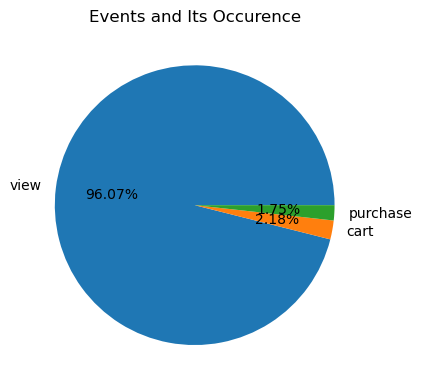

In [13]:
plt.figure(figsize=(6,4))
df.event_type.value_counts().plot(kind='pie',autopct='%1.2f%%')

plt.title('Events and Its Occurence')
plt.ylabel('')
plt.tight_layout()
plt.show()

Inferences
* Out of total records, view event has most occurance with 96 %.
* Only 2 % of the records are events when users added the products to the cart.
* This clearly shows the disparity in the customers intention in browsing the Site

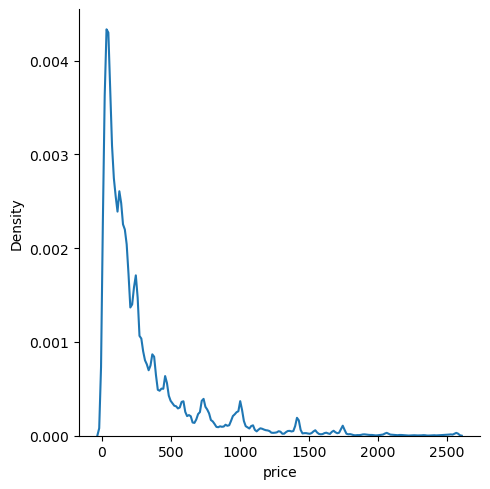

In [14]:
# Distribution of Price Column
sns.displot(df.price,kind='kde')
plt.show()

High number of products are priced from 0 to 500 and only few products are priced above that.
The price variable is right skewed with lot of outliers.

<Axes: >

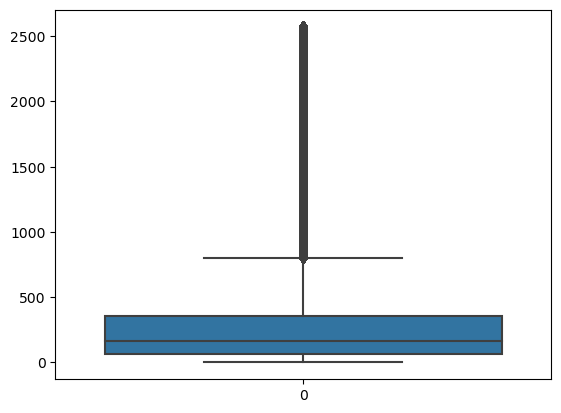

In [15]:
sns.boxplot(df.price,)

# Users Analysis

We need to know whether there is an opportunity for growth in sales from our dataset.

In [16]:
all_users = df.user_id.unique()
view_users = df[df.event_type == 'view'].user_id.unique()
purchase_users = df[df.event_type == 'purchase'].user_id.unique()
cart_users = df[df.event_type == 'cart'].user_id.unique()

In [17]:
only_view_users = set(view_users) - set(purchase_users) - set(cart_users)

In [18]:
only_cart_users = set(cart_users) - set(purchase_users)

In [19]:
direct_purchase_users = set(purchase_users) - set(cart_users)

In [20]:
user_info = pd.DataFrame({'User_type':
                                  ['Total',
                                   'Total_View',
                                   'View_without_cart_purchase',
                                   'Total_Cart',
                                   'Cart_without_purchase',
                                   'Total_Purchase',
                                   'Purchase_without_cart'
                                  ],
                              'Number_of_Users':
                                  [len(all_users),
                                    len(view_users),
                                   len(only_view_users),
                                   len(cart_users),
                                   len(only_cart_users),
                                   len(purchase_users),
                                   len(direct_purchase_users)
                                  ]
                             })

In [21]:
user_info

,User_type,Number_of_Users
0,Total,3022290
1,Total_View,3022130
2,View_without_cart_purchase,2540832
3,Total_Cart,337117
4,Cart_without_purchase,134340
5,Total_Purchase,347118
6,Purchase_without_cart,144341


In [22]:
len(only_cart_users)/len(cart_users)

0.39849666436281767

In the above table, out of the Users who have added a product to the cart,approximately **40% are not purchasing** the products

In [23]:
del all_users 
del view_users
del purchase_users 
del cart_users 

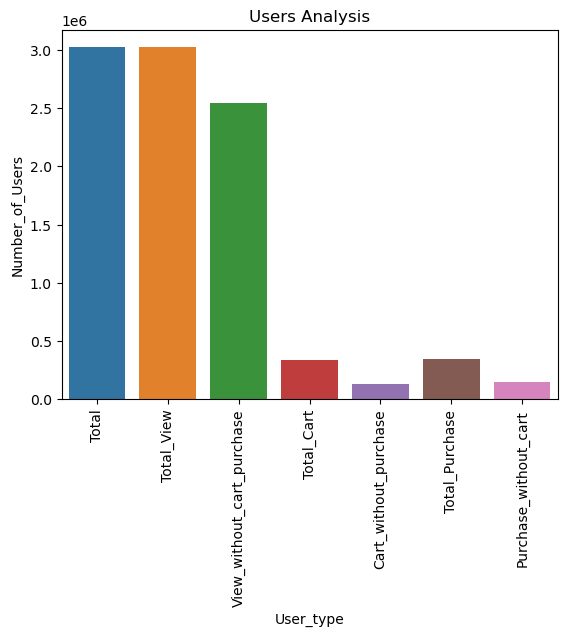

In [24]:
sns.barplot(x=user_info.User_type,y = user_info.Number_of_Users)
plt.xticks(rotation=90)
plt.title('Users Analysis')
plt.show()

In [25]:
# need another chart for price columns with cart and purchase

In [26]:
d = df.loc[:,['event_time','user_id']]

In [27]:
d['Day'] = d.event_time.dt.day_name()

In [28]:
d['Date'] = d.event_time.dt.date

In [29]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_traffic = pd.DataFrame(d.groupby('Day').agg(count = ('user_id',lambda x: x.nunique()))).reindex(cats).reset_index()
weekday_traffic

,Day,count
0,Monday,707787
1,Tuesday,889037
2,Wednesday,878913
3,Thursday,836989
4,Friday,762843
5,Saturday,713040
6,Sunday,737350


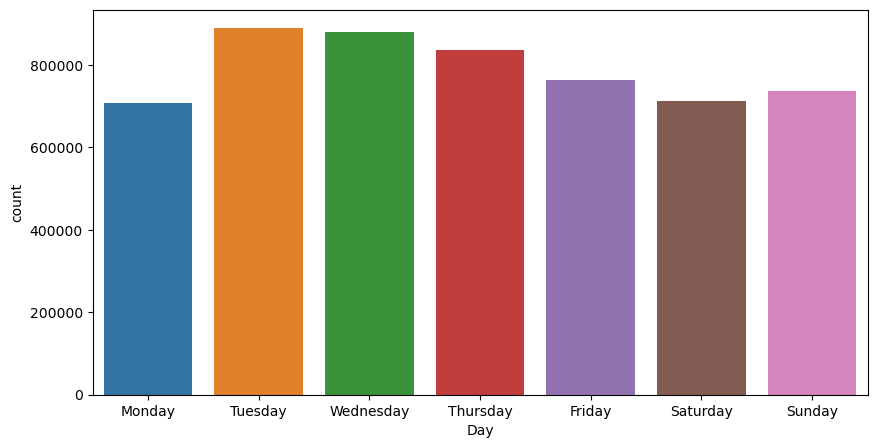

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_traffic['Day'],y=weekday_traffic['count'])
plt.show()

In the month of October ,the traffic is higher on Tuesday and Wednesday, and it  is lowest on Monday

## Daily Trend

In [31]:
daily_traffic = pd.DataFrame(d.groupby('Date').agg(count = ('user_id',lambda x: x.nunique()))).reset_index()
daily_traffic.head()

,Date,count
0,2019-10-01,190188
1,2019-10-02,184965
2,2019-10-03,170668
3,2019-10-04,209410
4,2019-10-05,194958


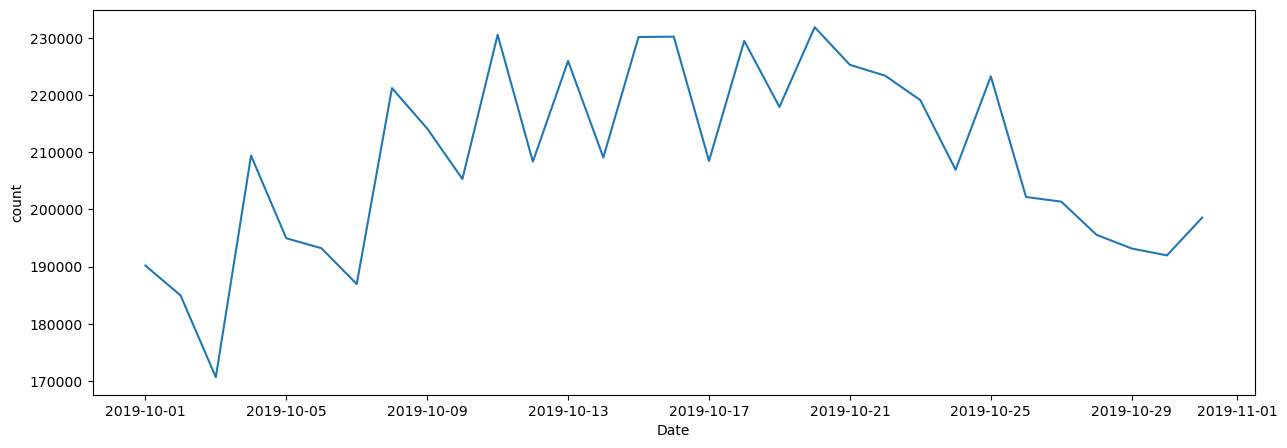

In [32]:
plt.figure(figsize=(15,5))
sns.lineplot(x=daily_traffic['Date'],y=daily_traffic['count'])
plt.show()

The traffic to the website is increasing till the third week of the month and its start to decrease at the end of the month

In [33]:
del d
del daily_traffic
del weekday_traffic

## Product Analysis

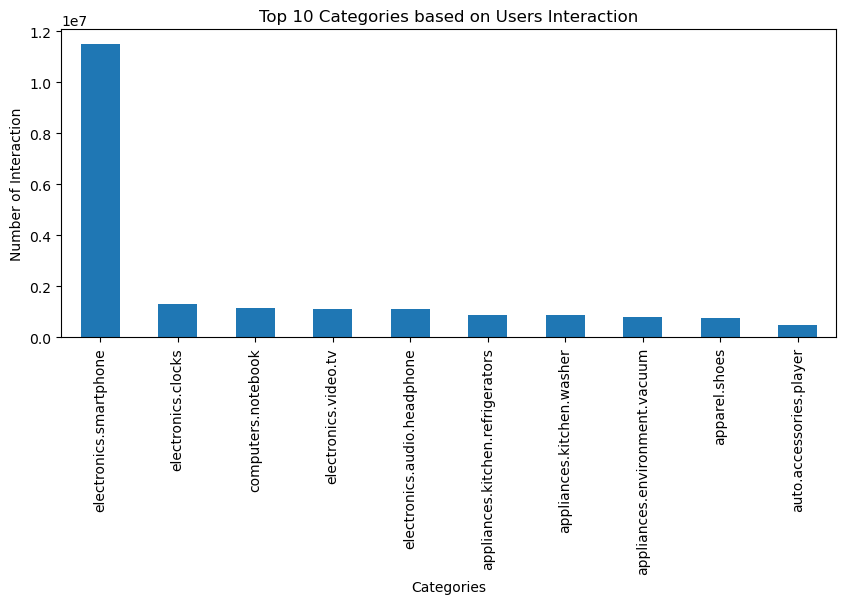

In [34]:
# top 10 Categories that customers interacted with
plt.figure(figsize=(10,4))
df.category_code.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

plt.ylabel('Number of Interaction')
plt.xlabel('Categories')
plt.title('Top 10 Categories based on Users Interaction')
plt.show()

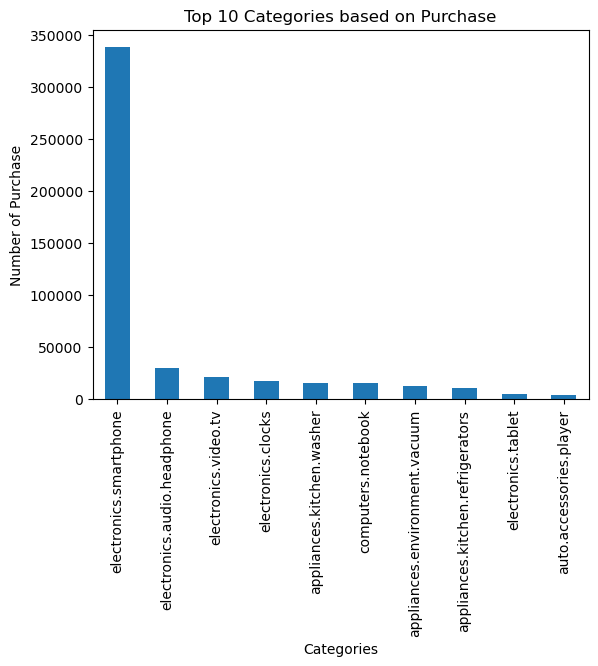

In [35]:
# Top 10 Categories that customer Purchased
df[df.event_type=='purchase'].category_code.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of Purchase')
plt.xlabel('Categories')
plt.title('Top 10 Categories based on Purchase')
plt.show()

The number of purchases as well as the interaction  for the smartphone category is exponentially higher than all the other categories.

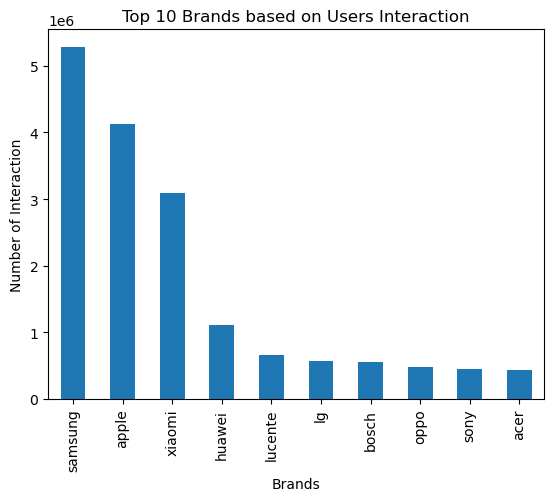

In [36]:
# top 10 brands that user interact with
df.brand.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of Interaction')
plt.xlabel('Brands')
plt.title('Top 10 Brands based on Users Interaction')
plt.show()

Samsung brand products has most customers interactions and then apple and xiaomi are falling behind it.

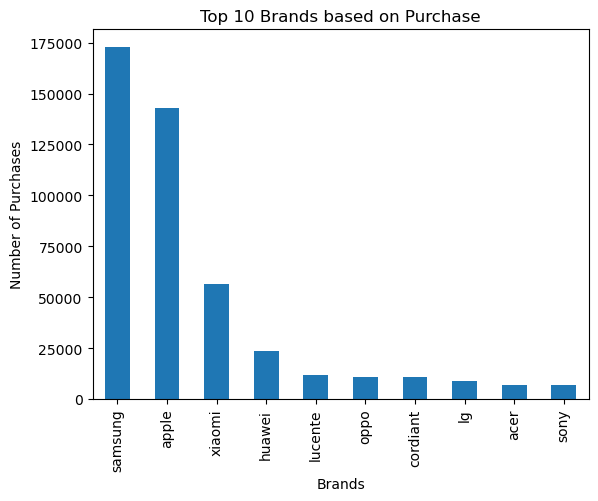

In [37]:
# top 10 brands that customers bought
df[df.event_type=='purchase'].brand.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

plt.ylabel('Number of Purchases')
plt.xlabel('Brands')
plt.title('Top 10 Brands based on Purchase')
plt.show()

The top 5 brands are the same in interaction and purchases.Hence these are the very popular brands in our Websites

### Bivariant Analysis

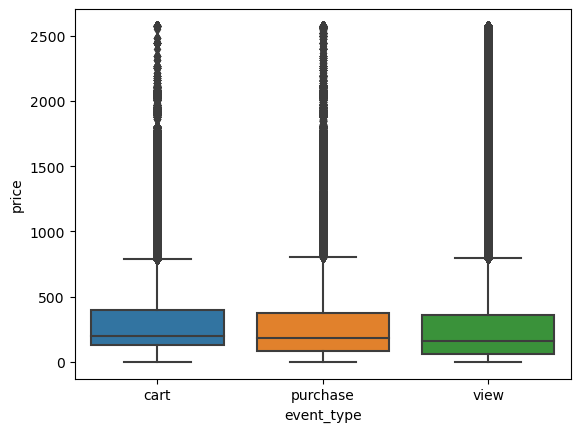

In [38]:
sns.boxplot(x=df.event_type,y=df.price)
plt.show()

There is no relative difference in price for event types.

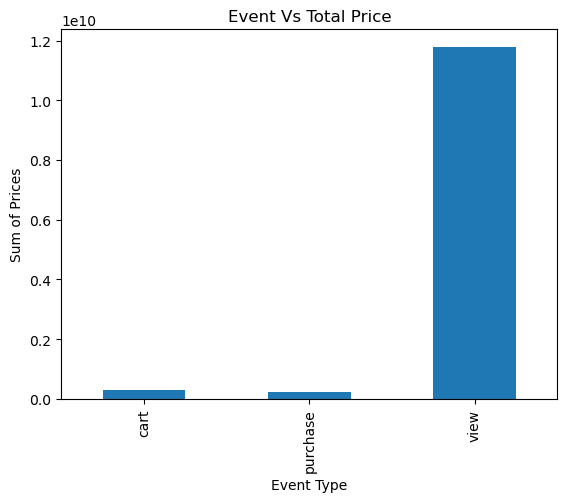

In [39]:
df.groupby('event_type')['price'].sum().plot(kind='bar')
plt.ylabel('Sum of Prices')
plt.xlabel('Event Type')
plt.title('Event Vs Total Price')
plt.show()

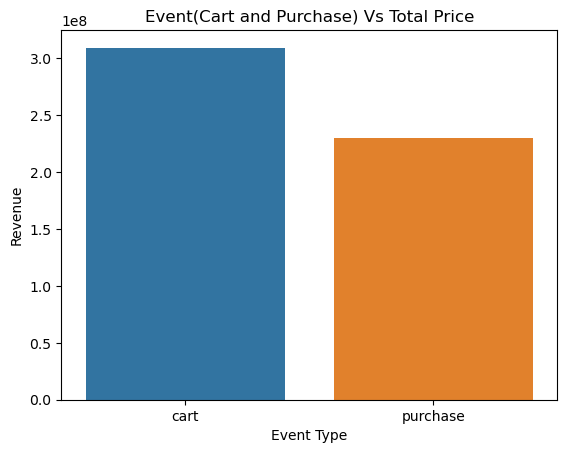

In [40]:
# Revenue Loss due to Cart Abandonment
d = df.groupby('event_type')['price'].sum().drop(index='view').reset_index()
sns.barplot(x=d.event_type.astype('object'),y=d.price)
plt.ylabel('Revenue')
plt.xlabel('Event Type')
plt.title('Event(Cart and Purchase) Vs Total Price')
plt.show()
del d

The difference in the bar shows us the revenue loss due to cart abandonment

# Feature Engineering

In [41]:
df_targets = df.loc[df["event_type"].isin(["cart","purchase"])]

In [42]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669365 entries, 162 to 42448657
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1669365 non-null  datetime64[ns, UTC]
 1   event_type     1669365 non-null  category           
 2   product_id     1669365 non-null  object             
 3   category_code  1390214 non-null  object             
 4   brand          1592254 non-null  object             
 5   price          1669365 non-null  float64            
 6   user_id        1669365 non-null  object             
 7   user_session   1669363 non-null  object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 103.5+ MB


In [43]:
# Since we want only the records that are unique for a event_type,we check for duplicates
# A user may visit the same page repeatedly in a single user session  a particular product
# for example user 156 in his session id 3675, may visit the cart page of product id 5555 repeadtedly

df_targets.duplicated(subset=['event_type', 'product_id','user_id','user_session']).sum()

350784

In [44]:
# we drop those rows from our Data
df_targets = df_targets.drop_duplicates(subset=['event_type', 'product_id', 'user_id','user_session'])

In [45]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318581 entries, 162 to 42448657
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1318581 non-null  datetime64[ns, UTC]
 1   event_type     1318581 non-null  category           
 2   product_id     1318581 non-null  object             
 3   category_code  1080501 non-null  object             
 4   brand          1250352 non-null  object             
 5   price          1318581 non-null  float64            
 6   user_id        1318581 non-null  object             
 7   user_session   1318579 non-null  object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 81.7+ MB


In [46]:
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)

In [47]:
df_targets.head(10)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,is_purchased
162,2019-10-01 00:02:14+00:00,purchase,1004856,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,1
308,2019-10-01 00:04:37+00:00,purchase,1002532,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,1
331,2019-10-01 00:05:14+00:00,cart,5100816,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae,0
379,2019-10-01 00:06:02+00:00,purchase,5100816,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,1
442,2019-10-01 00:07:07+00:00,purchase,13800054,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,1
574,2019-10-01 00:09:26+00:00,purchase,4804055,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,1
583,2019-10-01 00:09:33+00:00,cart,1002524,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,0
603,2019-10-01 00:09:54+00:00,purchase,4804056,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,1
618,2019-10-01 00:10:08+00:00,purchase,1002524,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,1
672,2019-10-01 00:10:56+00:00,purchase,6200687,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0,1


In [48]:
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")

In [49]:
df_targets.sort_values(by=["user_session","product_id"]).head(20)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,is_purchased
6952876,2019-10-06 11:33:54+00:00,cart,1004870,electronics.smartphone,samsung,289.52,546521725,00000083-8816-4d58-a9b8-f52f54186edc,1.0
6953633,2019-10-06 11:34:30+00:00,purchase,1004870,electronics.smartphone,samsung,289.52,546521725,00000083-8816-4d58-a9b8-f52f54186edc,1.0
33783085,2019-10-25 08:34:23+00:00,cart,1004834,electronics.smartphone,samsung,171.9,560486342,000001fd-1f89-45e8-a3ce-fe3218cabfad,1.0
33789818,2019-10-25 08:39:11+00:00,purchase,1004834,electronics.smartphone,samsung,171.9,560486342,000001fd-1f89-45e8-a3ce-fe3218cabfad,1.0
22783935,2019-10-17 13:35:24+00:00,purchase,1005031,electronics.smartphone,xiaomi,189.89,560744406,00004ada-8f93-49a6-956d-4ed71ae94791,1.0
19339030,2019-10-15 08:03:21+00:00,cart,3600163,appliances.kitchen.washer,indesit,182.41,520649833,00005026-a9d1-4e2b-8290-3cc14e4bad89,0.0
19343165,2019-10-15 08:06:04+00:00,cart,4000169,construction.tools.generator,tefal,90.07,520649833,00005026-a9d1-4e2b-8290-3cc14e4bad89,1.0
19347651,2019-10-15 08:09:02+00:00,purchase,4000169,construction.tools.generator,tefal,90.07,520649833,00005026-a9d1-4e2b-8290-3cc14e4bad89,1.0
18279951,2019-10-14 13:23:19+00:00,cart,10700055,NaN,NaN,38.35,531956094,00005731-b1c2-4291-a2e4-3b3c87d85114,0.0
31506637,2019-10-23 14:23:56+00:00,purchase,1004806,electronics.smartphone,xiaomi,342.09,534210306,00005b76-13ba-4afe-b80d-2f2b337d3e92,1.0


In [50]:
df_targets = df_targets.loc[df_targets["event_type"]=="cart"]

In [51]:
df_targets.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,is_purchased
331,2019-10-01 00:05:14+00:00,cart,5100816,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae,0.0
583,2019-10-01 00:09:33+00:00,cart,1002524,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,1.0
680,2019-10-01 00:11:00+00:00,cart,4804056,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,0.0
1325,2019-10-01 02:17:59+00:00,cart,1004833,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,0.0
1654,2019-10-01 02:19:36+00:00,cart,1005003,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,1.0


In [52]:
df_targets['Day'] = df_targets.event_time.dt.day_name()

In [53]:
df_targets["category_1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

In [54]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628209 entries, 331 to 42448292
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     628209 non-null  datetime64[ns, UTC]
 1   event_type     628209 non-null  category           
 2   product_id     628209 non-null  object             
 3   category_code  554290 non-null  object             
 4   brand          615416 non-null  object             
 5   price          628209 non-null  float64            
 6   user_id        628209 non-null  object             
 7   user_session   628207 non-null  object             
 8   is_purchased   628207 non-null  float64            
 9   Day            628209 non-null  object             
 10  category_1     554290 non-null  category           
 11  category_2     554290 non-null  category           
dtypes: category(3), datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 49.7+ MB


In [55]:
df_targets.dropna(how='any', inplace=True)

In [56]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546599 entries, 583 to 42448292
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     546599 non-null  datetime64[ns, UTC]
 1   event_type     546599 non-null  category           
 2   product_id     546599 non-null  object             
 3   category_code  546599 non-null  object             
 4   brand          546599 non-null  object             
 5   price          546599 non-null  float64            
 6   user_id        546599 non-null  object             
 7   user_session   546599 non-null  object             
 8   is_purchased   546599 non-null  float64            
 9   Day            546599 non-null  object             
 10  category_1     546599 non-null  category           
 11  category_2     546599 non-null  category           
dtypes: category(3), datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 43.3+ MB


In [57]:
df_targets.is_purchased.value_counts()

is_purchased
1.0    273908
0.0    272691
Name: count, dtype: int64

In [58]:
df_targets.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,is_purchased,Day,category_1,category_2
583,2019-10-01 00:09:33+00:00,cart,1002524,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,1.0,Tuesday,electronics,smartphone
680,2019-10-01 00:11:00+00:00,cart,4804056,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,0.0,Tuesday,electronics,audio
1325,2019-10-01 02:17:59+00:00,cart,1004833,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,0.0,Tuesday,electronics,smartphone
1654,2019-10-01 02:19:36+00:00,cart,1005003,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,1.0,Tuesday,electronics,smartphone
1684,2019-10-01 02:19:43+00:00,cart,1004750,electronics.smartphone,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,1.0,Tuesday,electronics,smartphone


### User activity per Session

User activity per session is the number of event types a customer has intiated at each session.

In [59]:
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])]['user_id'].unique()

In [60]:
df_cart_purchase_users = df[df['user_id'].isin(cart_purchase_users)][['user_session','event_type']]

In [61]:
activity_per_session = df_cart_purchase_users.groupby(['user_session']).agg(activity_count = ('event_type','count')).reset_index()

In [62]:
df_targets = df_targets.merge(activity_per_session, on='user_session', how='left')

In [63]:
del df_cart_purchase_users
del activity_per_session

In [64]:
# checking for sessions that didn't have any activity
df_targets.isnull().sum()

event_time        0
event_type        0
product_id        0
category_code     0
brand             0
price             0
user_id           0
user_session      0
is_purchased      0
Day               0
category_1        0
category_2        0
activity_count    0
dtype: int64

In [65]:

df_targets.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,is_purchased,Day,category_1,category_2,activity_count
0,2019-10-01 00:09:33+00:00,cart,1002524,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,1.0,Tuesday,electronics,smartphone,4
1,2019-10-01 00:11:00+00:00,cart,4804056,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,0.0,Tuesday,electronics,audio,4
2,2019-10-01 02:17:59+00:00,cart,1004833,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,0.0,Tuesday,electronics,smartphone,7
3,2019-10-01 02:19:36+00:00,cart,1005003,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,1.0,Tuesday,electronics,smartphone,16
4,2019-10-01 02:19:43+00:00,cart,1004750,electronics.smartphone,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,1.0,Tuesday,electronics,smartphone,10


## User Average Session duration

User Session Duration is the time duration of the session a customer has spend in their website for the sessions when they have added a product to their cart

In [66]:
df_cart_purchase_users = df[df['user_id'].isin(cart_purchase_users)][['user_session','event_time']]

In [67]:
df_avg_session_time =df_cart_purchase_users.groupby('user_session').agg(start_time =('event_time','min'),end_time =('event_time','max') )

In [68]:
df_avg_session_time['duration'] = (df_avg_session_time.end_time - df_avg_session_time.start_time).dt.total_seconds()

In [69]:
df_avg_session_time = df_avg_session_time.reset_index()[['user_session','duration']]

In [70]:
df_targets = df_targets.merge(df_avg_session_time, on='user_session', how='left')

In [71]:
del df_cart_purchase_users
del df_avg_session_time

# Time between sessions

Time between sessions tell us after previous session how long the customers takes return to the website. 

In [72]:
df_cart_purchase_users = df[df['user_id'].isin(cart_purchase_users)][['user_session','user_id','event_time']]

In [73]:
df_time = df_cart_purchase_users.groupby(['user_id','user_session'])['event_time'].agg(['min','max'])

In [74]:
df_time = df_time.rename(columns={'min' : 'start_time','max':'end_time'}).reset_index()

In [75]:
df_time = df_time.sort_values(by=['user_id','start_time'])

In [76]:
df_time

,user_id,user_session,start_time,end_time
0,264649825,989271dc-0702-43f0-a72f-3ff3caa56ca5,2019-10-06 05:02:51+00:00,2019-10-06 05:04:13+00:00
4,264649825,b3a9b680-6970-4068-918d-ba4d29d43082,2019-10-06 15:22:18+00:00,2019-10-06 15:22:18+00:00
3,264649825,b128149a-c44b-46f8-9029-780546d8e398,2019-10-06 15:25:28+00:00,2019-10-06 15:59:57+00:00
2,264649825,b1265f21-cf39-49bd-af0a-88a1e2ef960a,2019-10-06 20:29:33+00:00,2019-10-06 20:40:11+00:00
1,264649825,a4efa763-8bb4-4d8a-a8c1-62bd9a18a6ab,2019-10-07 23:22:37+00:00,2019-10-07 23:24:18+00:00
...,...,...,...,...
3251769,566272904,fd4cc8d7-ee5a-4a45-a0d2-661a978ad340,2019-10-31 22:51:15+00:00,2019-10-31 22:52:27+00:00
3251770,566274637,1055400a-55b5-4d1e-9152-92e25c7e9266,2019-10-31 23:03:26+00:00,2019-10-31 23:06:14+00:00
3251771,566276996,a6b3e8c4-aa76-4218-9b75-c1f5c2742190,2019-10-31 23:25:17+00:00,2019-10-31 23:34:56+00:00
3251772,566278294,88aa1f8b-8a36-4767-a0e2-2b984c2190c1,2019-10-31 23:38:14+00:00,2019-10-31 23:43:11+00:00


In [77]:
df_time['previous_session_end_time']= df_time.groupby('user_id')['end_time'].transform(lambda x: x.shift(1))

In [78]:
df_time['time_between_session'] = round((df_time.start_time - df_time.previous_session_end_time).dt.total_seconds()/60,2)

In [79]:
df_time[10:15]

,user_id,user_session,start_time,end_time,previous_session_end_time,time_between_session
11,304325717,411a4f6d-bc10-498f-944d-cd15695bc53d,2019-10-29 12:31:29+00:00,2019-10-29 12:31:29+00:00,NaT,NaN
14,304325717,e35f3d61-f53e-428a-9e04-74d9a6ce9fbf,2019-10-29 12:33:54+00:00,2019-10-29 12:33:54+00:00,2019-10-29 12:31:29+00:00,2.42
12,304325717,58995857-c434-4319-85fd-84f2f4662251,2019-10-29 12:34:40+00:00,2019-10-29 12:34:40+00:00,2019-10-29 12:33:54+00:00,0.77
10,304325717,022f9a84-eaa5-4ad3-9402-219eebfcc1f8,2019-10-29 13:44:40+00:00,2019-10-29 14:22:10+00:00,2019-10-29 12:34:40+00:00,70.0
13,304325717,d6b934f3-eb2e-4d31-adf1-7d96c45b32b5,2019-10-29 13:48:18+00:00,2019-10-29 13:57:37+00:00,2019-10-29 14:22:10+00:00,-33.87


Splitting Data Into First time Users and Returning Users

In [80]:
df_time_first_time = df_time[df_time.time_between_session.isna()][['user_session','time_between_session']]

In [81]:
df_time_returning = df_time[~df_time.time_between_session.isna()][['user_session','time_between_session']]

In [82]:
df_targets_first_time = df_targets.merge(df_time_first_time, on='user_session', how='inner')

In [83]:
df_targets_returning = df_targets.merge(df_time_returning, on='user_session', how='inner')

In [84]:
df_targets_first_time.is_purchased.value_counts()

is_purchased
0.0    68929
1.0    66489
Name: count, dtype: int64

In [85]:
df_targets_returning.is_purchased.value_counts()

is_purchased
1.0    207419
0.0    203762
Name: count, dtype: int64

In [86]:
df_final_1 = df_targets_first_time.loc[:,['brand', 'price', 'Day', 'category_1', 'category_2', 'activity_count','duration','is_purchased']]

In [87]:
df_final_2 = df_targets_returning.loc[:,['brand', 'price', 'Day', 'category_1', 'category_2', 'activity_count','time_between_session','duration','is_purchased']]

In [88]:
df_final_1.head()

,brand,price,Day,category_1,category_2,activity_count,duration,is_purchased
0,apple,515.67,Tuesday,electronics,smartphone,4,112.0,1.0
1,apple,161.98,Tuesday,electronics,audio,4,147.0,0.0
2,samsung,174.76,Tuesday,electronics,smartphone,7,742.0,0.0
3,huawei,258.21,Tuesday,electronics,smartphone,16,843.0,1.0
4,xiaomi,360.08,Tuesday,electronics,smartphone,16,843.0,1.0


In [89]:
df_final_2.head()

,brand,price,Day,category_1,category_2,activity_count,time_between_session,duration,is_purchased
0,samsung,241.19,Tuesday,electronics,smartphone,8,0.57,334.0,0.0
1,apple,809.72,Tuesday,electronics,smartphone,3,7.8,24.0,0.0
2,xiaomi,197.55,Tuesday,electronics,smartphone,3,1.02,117.0,0.0
3,meizu,101.65,Tuesday,electronics,smartphone,5,5.23,285.0,1.0
4,samsung,388.68,Tuesday,electronics,smartphone,3,8.47,301.0,0.0


## Export Into CSV

In [135]:
# Exporting the Transformed final dataset saves us a lot time.

In [ ]:
df_final_1.to_csv('first_time.csv',index=False)

In [90]:
df_final_2.to_csv('returning.csv',index=False)

_____________________________________________________

# Exploratory Data Analysis: Enhanced Insights Post Feature Engineering and Data Cleansing

In [3]:
df_first_time = pd.read_csv('first_time.csv')
df_first_time.head()

,brand,price,Day,category_1,category_2,activity_count,duration,is_purchased
0,apple,515.67,Tuesday,electronics,smartphone,4,112.0,1.0
1,apple,161.98,Tuesday,electronics,audio,4,147.0,0.0
2,samsung,174.76,Tuesday,electronics,smartphone,7,742.0,0.0
3,huawei,258.21,Tuesday,electronics,smartphone,16,843.0,1.0
4,xiaomi,360.08,Tuesday,electronics,smartphone,16,843.0,1.0


In [4]:
df_returning = pd.read_csv('returning.csv')
df_returning.head()

,brand,price,Day,category_1,category_2,activity_count,time_between_session,duration,is_purchased
0,samsung,241.19,Tuesday,electronics,smartphone,8,0.57,334.0,0.0
1,apple,809.72,Tuesday,electronics,smartphone,3,7.80,24.0,0.0
2,xiaomi,197.55,Tuesday,electronics,smartphone,3,1.02,117.0,0.0
3,meizu,101.65,Tuesday,electronics,smartphone,5,5.23,285.0,1.0
4,samsung,388.68,Tuesday,electronics,smartphone,3,8.47,301.0,0.0


In [52]:
df_first_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135418 entries, 0 to 135417
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brand           135418 non-null  object 
 1   price           135418 non-null  float64
 2   Day             135418 non-null  object 
 3   category_1      135418 non-null  object 
 4   category_2      135418 non-null  object 
 5   activity_count  135418 non-null  int64  
 6   duration        135418 non-null  float64
 7   is_purchased    135418 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.3+ MB


In [53]:
df_first_time.describe()

,price,activity_count,duration,is_purchased
count,135418.000000,135418.000000,1.354180e+05,135418.000000
mean,375.277199,8.375246,9.188253e+02,0.490991
std,365.126905,8.231457,1.597590e+04,0.499921
min,1.000000,1.000000,0.000000e+00,0.000000
25%,140.230000,4.000000,1.250000e+02,0.000000
50%,243.720000,6.000000,2.660000e+02,0.000000
75%,460.720000,10.000000,5.670000e+02,1.000000
max,2574.040000,175.000000,2.160329e+06,1.000000


In [95]:
df_returning.describe()

,price,activity_count,time_between_session,duration,is_purchased
count,"411,181.0","411,181.0","411,181.0","411,181.0","411,181.0"
mean,377.79360135803955,9.21601922267809,"3,089.8954142336347",820.4834561908259,0.50444694672176
std,369.90899877345623,10.030612650616808,"5,445.913674905638","11,259.510002700807",0.4999808322551185
min,1.0,1.0,"-20,385.87",0.0,0.0
25%,138.74,4.0,22.75,104.0,0.0
50%,238.35,6.0,765.03,243.0,1.0
75%,463.07,11.0,"3,488.07",582.0,1.0
max,"2,574.04",388.0,"43,898.37","2,027,983.0",1.0


In [96]:
df_returning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411181 entries, 0 to 411180
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   brand                 411181 non-null  object 
 1   price                 411181 non-null  float64
 2   Day                   411181 non-null  object 
 3   category_1            411181 non-null  object 
 4   category_2            411181 non-null  object 
 5   activity_count        411181 non-null  int64  
 6   time_between_session  411181 non-null  float64
 7   duration              411181 non-null  float64
 8   is_purchased          411181 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 28.2+ MB


In [97]:
df_first_time.isnull().sum()

brand             0
price             0
Day               0
category_1        0
category_2        0
activity_count    0
duration          0
is_purchased      0
dtype: int64

In [98]:
df_returning.isnull().sum()

brand                   0
price                   0
Day                     0
category_1              0
category_2              0
activity_count          0
time_between_session    0
duration                0
is_purchased            0
dtype: int64

In [99]:
df_first_time.skew(numeric_only =True)

price             1.9200875518914016
activity_count     4.493521334233853
duration            70.0445958507604
is_purchased     0.03604281871116032
dtype: float64

In [100]:
df_returning.skew(numeric_only =True)

price                     1.8256848531007204
activity_count             5.189084985552693
time_between_session      2.7873340459409937
duration                   86.38099335653146
is_purchased           -0.017788555340896753
dtype: float64

In [101]:
df_first_time.std(numeric_only=True)

price              365.1269046545994
activity_count     8.231457399680966
duration         15,975.902804614918
is_purchased      0.4999206746165536
dtype: float64

In [102]:
df_returning.std(numeric_only=True)

price                   369.90899877345623
activity_count          10.030612650616808
time_between_session    5,445.913674905638
duration               11,259.510002700807
is_purchased            0.4999808322551185
dtype: float64

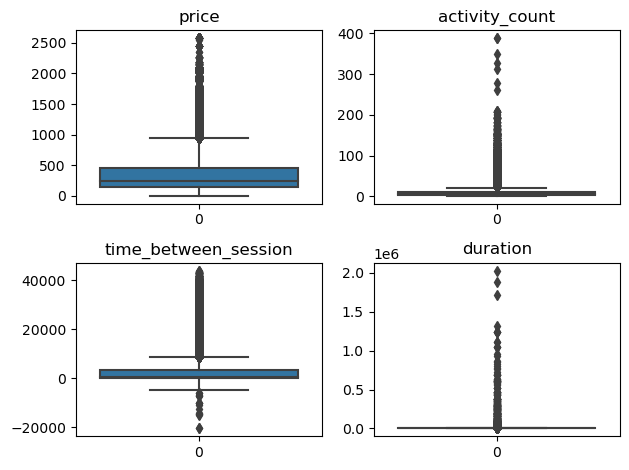

In [103]:
for i,j in enumerate(df_returning.select_dtypes('number').drop(columns='is_purchased').columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(df_returning[j])
    plt.title(j)
plt.tight_layout()
plt.show()

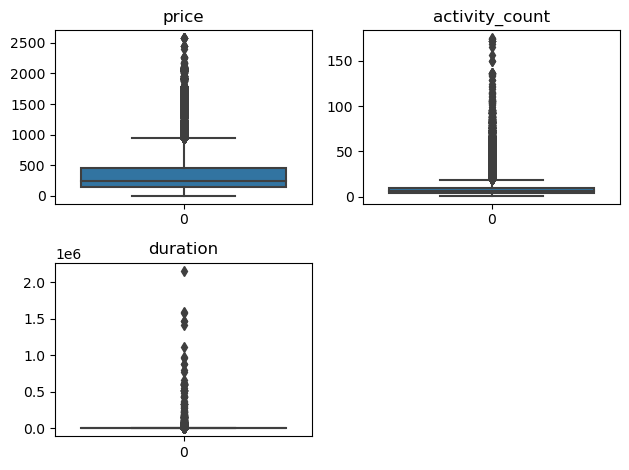

In [104]:
for i,j in enumerate(df_first_time.select_dtypes('number').drop(columns='is_purchased').columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(df_first_time[j])
    plt.title(j)
plt.tight_layout()
plt.show()

In [105]:
# Outliers present in the data
q1 = df_first_time.quantile(0.25,numeric_only=True)
q3 = df_first_time.quantile(0.75,numeric_only=True)

iqr = q3 - q1

ul = q3 + (1.5 * iqr)

ll = q1 - (1.5 * iqr)


df_first_time[(((df_first_time.select_dtypes('number') > ul) | (df_first_time.select_dtypes('number')< ll)).any(axis=1))]

,brand,price,Day,category_1,category_2,activity_count,duration,is_purchased
12,apple,"1,747.79",Tuesday,electronics,smartphone,10,198.0,1.0
13,apple,"1,747.79",Tuesday,electronics,smartphone,5,"6,965.0",0.0
14,apple,"1,413.16",Tuesday,electronics,smartphone,6,82.0,0.0
15,nokia,43.66,Tuesday,electronics,telephone,16,"9,236.0",1.0
16,apple,464.13,Tuesday,electronics,smartphone,16,"9,236.0",0.0
...,...,...,...,...,...,...,...,...
135410,samsung,88.29,Thursday,electronics,smartphone,41,"1,711.0",1.0
135411,apple,949.47,Thursday,electronics,smartphone,2,72.0,0.0
135414,xiaomi,94.7,Thursday,electronics,smartphone,20,"2,991.0",0.0
135416,apple,"1,661.09",Thursday,electronics,smartphone,4,297.0,1.0


In [106]:
# Outliers present in the data
q1 = df_first_time.duration.quantile(0.25)
q3 = df_first_time.duration.quantile(0.75)

iqr = q3 - q1

ul = q3 + (10 * iqr)

ll = q1 - (10 * iqr)


df_first_time[~(((df_first_time.duration > ul) | (df_first_time.duration< ll)))]

,brand,price,Day,category_1,category_2,activity_count,duration,is_purchased
0,apple,515.67,Tuesday,electronics,smartphone,4,112.0,1.0
1,apple,161.98,Tuesday,electronics,audio,4,147.0,0.0
2,samsung,174.76,Tuesday,electronics,smartphone,7,742.0,0.0
3,huawei,258.21,Tuesday,electronics,smartphone,16,843.0,1.0
4,xiaomi,360.08,Tuesday,electronics,smartphone,16,843.0,1.0
...,...,...,...,...,...,...,...,...
135413,apple,160.57,Thursday,electronics,audio,2,30.0,0.0
135414,xiaomi,94.7,Thursday,electronics,smartphone,20,"2,991.0",0.0
135415,samsung,170.14,Thursday,electronics,smartphone,8,183.0,1.0
135416,apple,"1,661.09",Thursday,electronics,smartphone,4,297.0,1.0


In [107]:
df_first_time

,brand,price,Day,category_1,category_2,activity_count,duration,is_purchased
0,apple,515.67,Tuesday,electronics,smartphone,4,112.0,1.0
1,apple,161.98,Tuesday,electronics,audio,4,147.0,0.0
2,samsung,174.76,Tuesday,electronics,smartphone,7,742.0,0.0
3,huawei,258.21,Tuesday,electronics,smartphone,16,843.0,1.0
4,xiaomi,360.08,Tuesday,electronics,smartphone,16,843.0,1.0
...,...,...,...,...,...,...,...,...
135413,apple,160.57,Thursday,electronics,audio,2,30.0,0.0
135414,xiaomi,94.7,Thursday,electronics,smartphone,20,"2,991.0",0.0
135415,samsung,170.14,Thursday,electronics,smartphone,8,183.0,1.0
135416,apple,"1,661.09",Thursday,electronics,smartphone,4,297.0,1.0


In [104]:
# Outliers present in the data
q1 = df_returning.quantile(0.25,numeric_only=True)
q3 = df_returning.quantile(0.75,numeric_only=True)

iqr = q3 - q1

ul = q3 + (1.5 * iqr)

ll = q1 - (1.5 * iqr)


 df_returning[~(((df_returning.select_dtypes('number') > ul) | (df_returning.select_dtypes('number')< ll)).any(axis=1))]

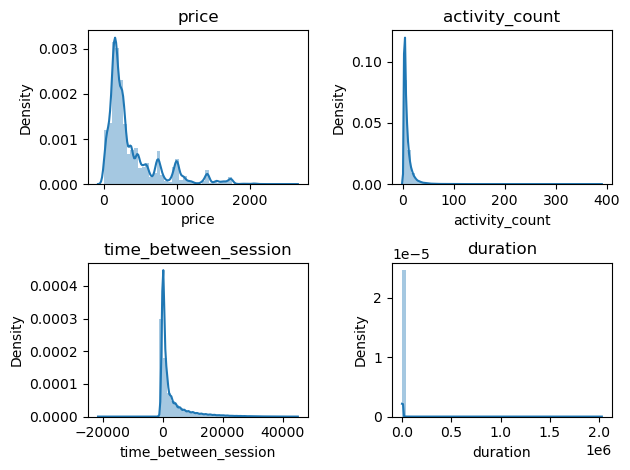

In [109]:
for i,j in enumerate(df_returning.select_dtypes('number').drop(columns='is_purchased').columns):
    plt.subplot(2,2,i+1)
    sns.distplot(df_returning[j])
    plt.title(j)
plt.tight_layout()
plt.show()

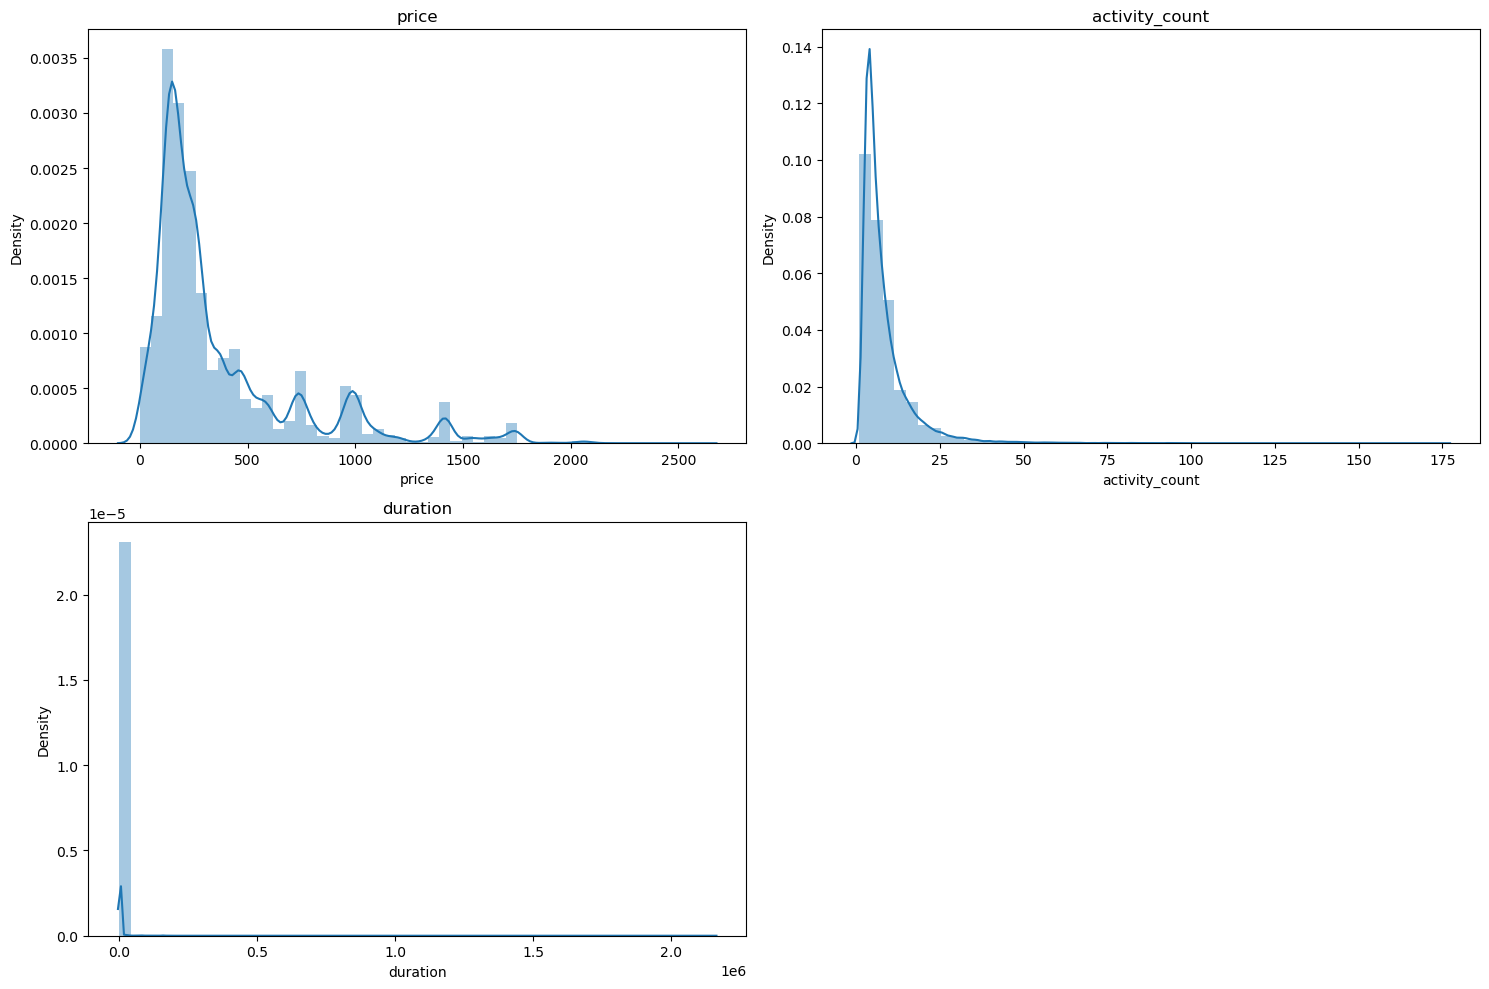

In [110]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df_first_time.select_dtypes('number').drop(columns='is_purchased').columns):
    plt.subplot(2,2,i+1)
    sns.distplot(df_first_time[j])
    plt.title(j)
plt.tight_layout()
plt.show()

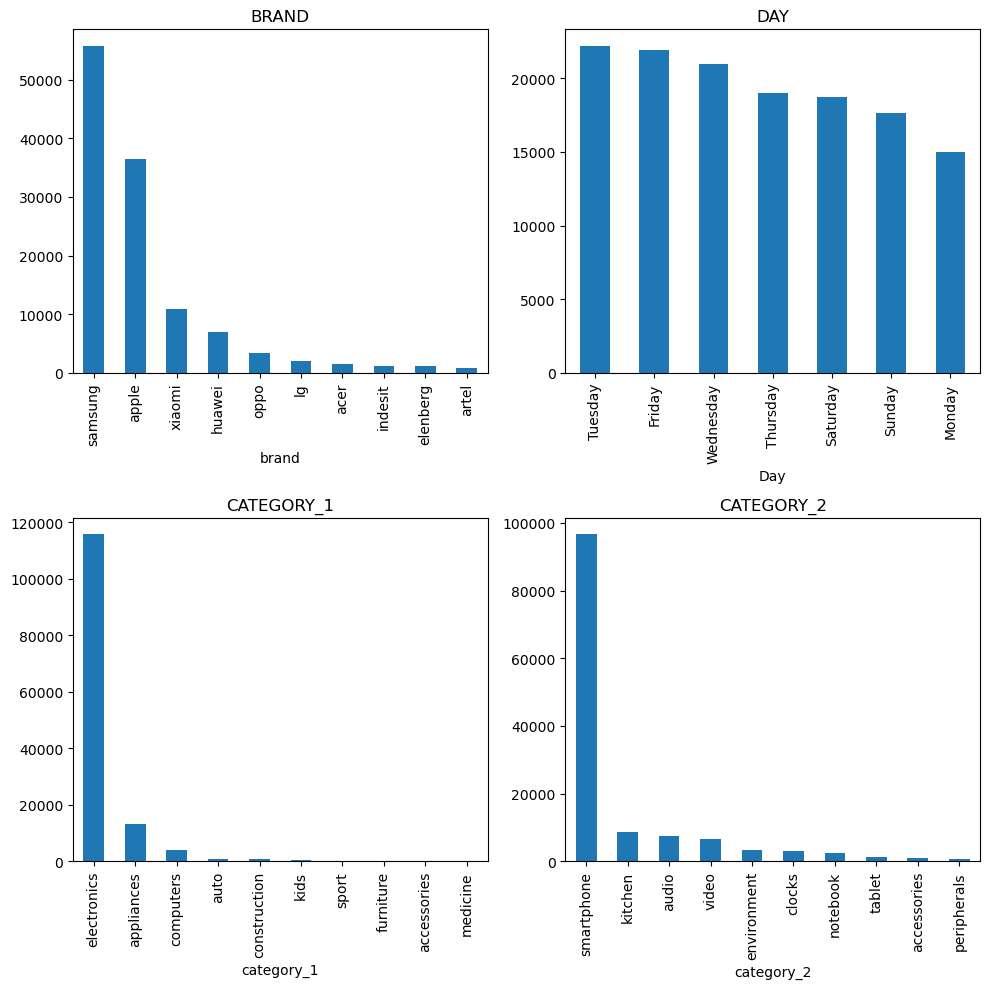

In [111]:
plt.figure(figsize=(10,10))
for i,j in enumerate(df_first_time.select_dtypes('object').columns):
    plt.subplot(2,2,i+1)
    df_first_time[j].value_counts().sort_values(ascending=False).head(10).plot.bar()
    plt.title(j.upper())
plt.tight_layout()
plt.show()

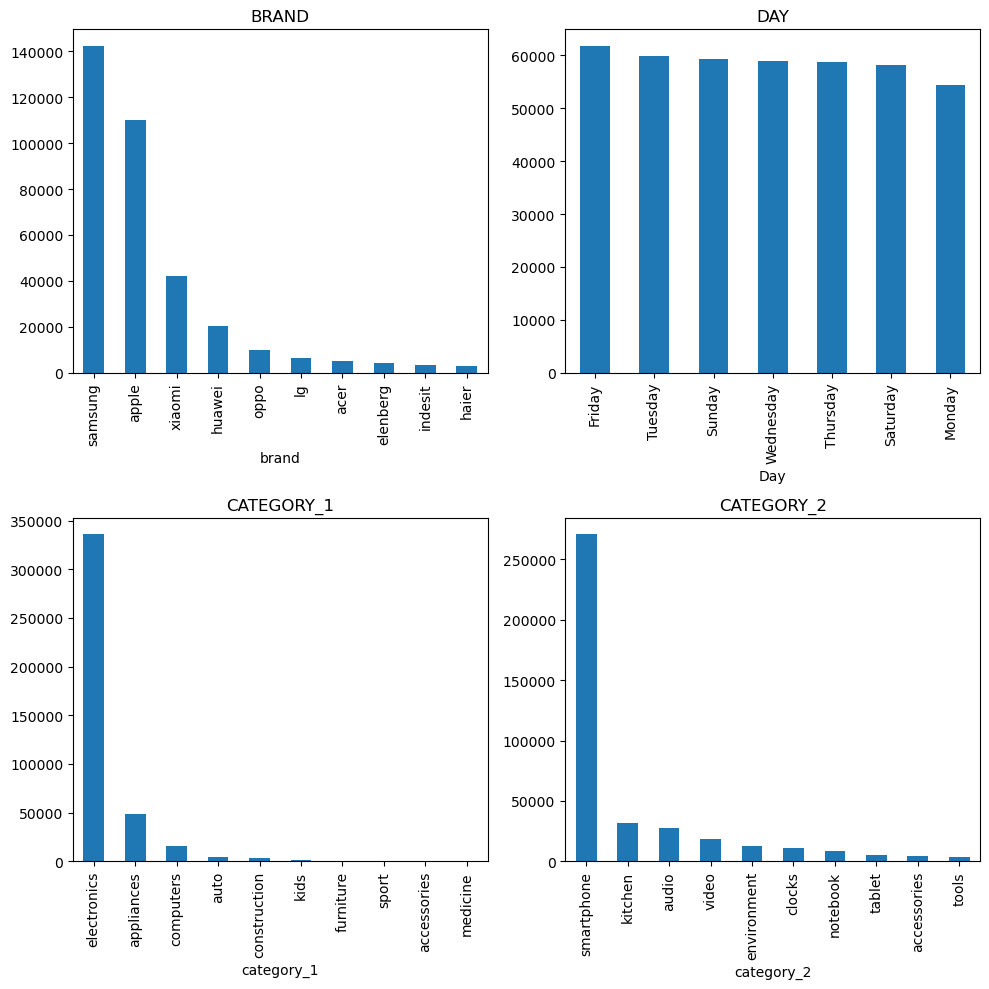

In [112]:
plt.figure(figsize=(10,10))
for i,j in enumerate(df_returning.select_dtypes('object').columns):
    plt.subplot(2,2,i+1)
    df_returning[j].value_counts().sort_values(ascending=False).head(10).plot.bar()
    plt.title(j.upper())
plt.tight_layout()
plt.show()

### Bi Variant Analysis

<Axes: >

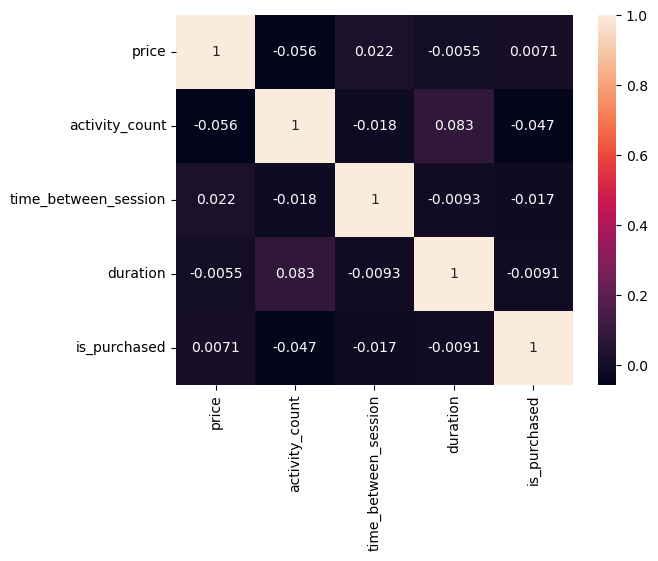

In [113]:
 sns.heatmap(df_returning.corr(numeric_only =True),annot=True)

<Axes: >

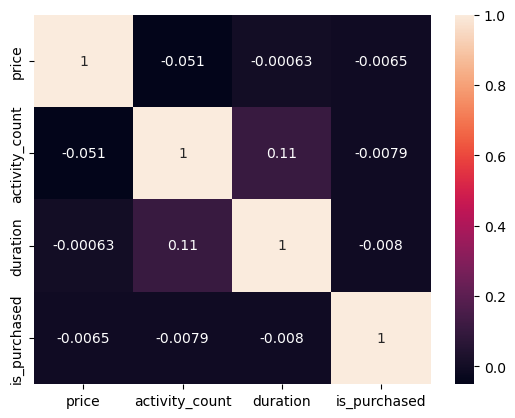

In [114]:
sns.heatmap(df_first_time.corr(numeric_only =True),annot=True)

In [115]:
df_first_time.groupby('category_1')[['price','activity_count']].agg(['min','max','mean'])

price                             activity_count       \
               min      max               mean            min  max   
category_1                                                           
accessories   7.44   298.57  70.96803571428572              2   58   
apparel      17.22    20.05 18.634999999999998              3   11   
appliances    5.12 2,574.04 202.85155311909264              1  172   
auto         20.57   420.09 125.62564941921859              2  119   
computers     3.06 2,574.04 423.40361518987345              1  135   
construction  9.78   867.24  119.9117967599411              2   71   
country_yard 91.33   297.54 133.37857142857143              4   16   
electronics    1.0 2,573.79 398.49393690175884              1  175   
furniture     5.89   398.95 106.84620481927712              2   78   
kids          4.09    725.6  189.4547214854111              1   93   
medicine     26.26    72.05 43.715384615384615              2   39   
sport        62.31   926.41 210.99470270270268              2   64   
stationery    5.64     66.9          16.664375              2   15   

                                 
                           mean  
category_1                       
accessories  11.089285714285714  
apparel                     7.0  
appliances   10.545103969754253  
auto           9.81414994720169  
computers    10.347848101265823  
construction 10.948453608247423  
country_yard  8.428571428571429  
electronics   8.022581982791388  
furniture    12.024096385542169  
kids          9.830238726790451  
medicine      8.903846153846153  
sport         7.940540540540541  
stationery                 6.75

In [116]:
df_first_time.groupby('category_2')[['price','activity_count']].agg(['min','max','mean'])

price                             activity_count       \
                  min      max               mean            min  max   
category_2                                                              
accessories     20.57   420.09 125.62564941921859              2  119   
audio             1.0   461.21 119.56133665312542              1  114   
bag              7.44   298.57  70.96803571428572              2   58   
bathroom        58.22    58.22              58.22             16   16   
bedroom         136.4   257.38 166.72479166666668              2   78   
bicycle         62.31   926.41 216.00845238095238              2   64   
camera          58.93 2,002.37 370.43815789473683              2   62   
carriage        41.16   373.24 108.83719008264463              1   63   
cartrige         5.64     66.9          16.664375              2   15   
clocks           9.46 1,878.68 318.77591452991453              1   91   
components        7.4 1,333.34 147.86048034934498              2   59   
cultivator     297.54   297.54             297.54             16   16   
desktop          5.09 2,574.04   307.575652173913              2  106   
dolls           14.39    82.11  39.00518518518519              2   93   
ebooks          93.43   254.81 149.77891304347827              2   44   
environment      5.68 1,395.12 124.56886108714409              2  172   
fmcg            13.62    17.71            14.6425              4    7   
iron             9.76   669.23   63.6988986013986              2   67   
ironing_board     7.7   100.36   38.6972972972973              2   58   
kitchen          5.12 2,574.04  251.1050302466263              1  169   
lawn_mower      91.33   124.33 106.01833333333333              4   12   
living_room     35.92   398.95  73.82255319148936              2   76   
notebook         7.44 2,393.86  556.8847955846279              1  102   
peripherals      3.06  1,029.6 173.93307692307692              2  135   
personal          7.7   101.03 25.587175324675325              2   69   
sewing_machine  70.68 1,265.91 168.99803278688526              2   84   
skates          17.99    725.6  374.5420422535211              2   31   
smartphone       38.3 2,110.45  428.9939763038079              1  175   
swing           45.55   215.96  94.47217391304348              4   62   
tablet          36.19  2,059.0 218.58157894736843              2   79   
telephone        6.36    97.51 37.522087628865975              2   82   
tools            9.78   867.24  114.8005364511692              2   71   
toys             4.09    74.62 29.759833333333333              2   31   
trainer         141.8   167.55  161.4470588235294              2   25   
tshirt          17.22    20.05 18.634999999999998              3   11   
video          102.19 2,573.79 385.92236829908853              1  106   

                                   
                             mean  
category_2                         
accessories      9.81414994720169  
audio            7.36561394312672  
bag            11.089285714285714  
bathroom                     16.0  
bedroom        12.145833333333334  
bicycle         7.619047619047619  
camera          8.276315789473685  
carriage       12.305785123966942  
cartrige                     6.75  
clocks          8.050256410256411  
components     10.925764192139738  
cultivator                   16.0  
desktop        11.632850241545894  
dolls          14.814814814814815  
ebooks          11.76086956521739  
environment    10.320966350301985  
fmcg                         5.25  
iron            10.77972027972028  
ironing_board   16.62162162162162  
kitchen        10.567589576547231  
lawn_mower      7.166666666666667  
living_room    12.872340425531915  
notebook       10.457481602616516  
peripherals      9.15140415140415  
personal       10.659090909090908  
sewing_machine 11.350819672131147  
skates          6.352112676056338  
smartphone      7.966442466887417  
swing                        17.0  
tablet          

### Checking whether the Target variable is Balanced or not:

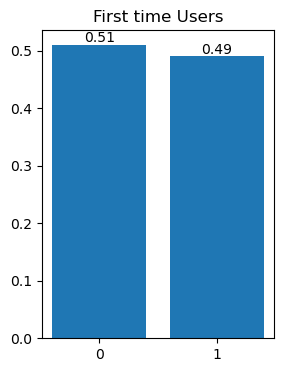

In [117]:
plt.figure(figsize=(3,4))
count1 = df_first_time.is_purchased.value_counts(normalize=True).sort_index().reset_index()
plt.bar(count1.is_purchased,round(count1['proportion'],2))
plt.xticks(ticks = [0,1])
plt.title('First time Users')
for i, value in enumerate(round(count1['proportion'],2)):
    plt.text(i, value, str(value), ha='center', va='bottom')

Text(0.5, 1.0, 'Returning Users')

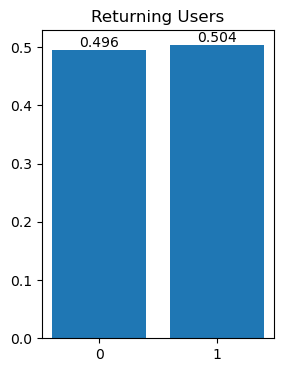

In [118]:
plt.figure(figsize=(3,4))
count2 = df_returning.is_purchased.value_counts(normalize=True).sort_index().reset_index()
plt.bar(count2.is_purchased,round(count2['proportion'],3))
plt.xticks(ticks = [0,1])
for i, value in enumerate(round(count2['proportion'],3)):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.title('Returning Users')

## Statistical Testing for finding the significance of the variables

### For First time users

###  1) Relationship between target variable and Day variable

In [119]:
from scipy.stats import chi2_contingency
from scipy import stats

𝐻0
 : The variables are independent

𝐻1
: The variables are not independent (i.e. variables are dependent)

In [120]:
obs = pd.crosstab(df_first_time.is_purchased,df_first_time.Day)

In [121]:
chi2_contingency(obs)

Chi2ContingencyResult(statistic=195.39137884806135, pvalue=1.8151483890165258e-39, dof=6, expected_freq=array([[11141.19210149,  7635.13713096,  9523.56104801,  8963.65099174,
         9677.28180892, 11302.54799953, 10685.62891935],
       [10746.80789851,  7364.86286904,  9186.43895199,  8646.34900826,
         9334.71819108, 10902.45200047, 10307.37108065]]))

In [122]:
p_value = chi2_contingency(obs)[1]
p_value

1.8151483890165258e-39

In [123]:
p_value < 0.05

True

In [124]:
# Pvalue = 0
# significane level = 0.05
# since Pvalue is less than Siginificane value , Reject Null Hypothesis 
# Hence there is Relationship between Day of the week and Purchase

### 2) Relationship  between target Variable and Price variable

In [125]:
# Test of Normality - Shapiro  test
# Ho: skew=0 (normal)
# Ha : skew!=0 (not normal)
stats.shapiro(df_first_time.price)

ShapiroResult(statistic=0.7626481652259827, pvalue=0.0)

The data is not normal, so we perform non parametric test

In [126]:
# split  the data into two samples -- 1)price of the products who have purchased, and 2) those who have not purchased
purchased = df_first_time[df_first_time.is_purchased == 1].price 
not_purchased = df_first_time[df_first_time.is_purchased == 0].price 

In [127]:
# h0 : median price of products  purchased =
#      median price of products  not purchased
# h1 : median price of products  purchased !=
#      median price of products  not purchased 

In [128]:
# PERFORM Mann-Whitney U Test
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=2311580719.5, pvalue=0.00525689965241378)

There is relation between Target variable and the Price Variable

### 3) Relationship  between target Variable and Activity Count variable

In [129]:
# Test of Normality - Shapiro  test
# Ho: skew=0 (normal)
# Ha : skew!=0 (not normal)
stats.shapiro(df_first_time.activity_count)

ShapiroResult(statistic=0.6319149732589722, pvalue=0.0)

The data is not normal, so we perform non parametric test

In [130]:
# split  the data into two samples -- 1)price of the products who have purchased, and 2) those who have not purchased
purchased = df_first_time[df_first_time.is_purchased == 1].activity_count 
not_purchased = df_first_time[df_first_time.is_purchased == 0].activity_count 

In [131]:
# h0 : median number of activities of users who have purchased =
#      median number of activities of users who have not purchased
# h1 : median number of activities of users who have purchased !=
#      median number of activities of users who have not purchased

In [132]:
# PERFORM Mann-Whitney U Test
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=2518383791.0, pvalue=1.495295836484217e-220)

There is relation between Target variable and Number of Activity  by the user

### 4) Relationship  between target Variable and Duration variable

In [133]:
# Test of Normality - Shapiro  test
# Ho: skew=0 (normal)
# Ha : skew!=0 (not normal)
stats.shapiro(df_first_time.duration)

ShapiroResult(statistic=0.01567763090133667, pvalue=0.0)

The data is not normal, so we perform non parametric test

In [134]:
# split  the data into two samples -- 1)price of the products who have purchased, and 2) those who have not purchased
purchased = df_first_time[df_first_time.is_purchased == 1].duration 
not_purchased = df_first_time[df_first_time.is_purchased == 0].duration 

In [135]:
# h0 : median duration of sessions with purchases =
#      median duration of sessions without purchases
# h1 : median duration of sessions with purchases !=
#      median duration of sessions without purchases

In [136]:
# PERFORM Mann-Whitney U Test
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=2581888872.5, pvalue=0.0)

There is relation between Target variable and Duration of the sessions

### For Returning Users

###  1) Relationship between target variable and Day variable

In [137]:
from scipy.stats import chi2_contingency
from scipy import stats

𝐻0
 : The variables are independent

𝐻1
: The variables are not independent (i.e. variables are dependent)

In [138]:
obs = pd.crosstab(df_returning.is_purchased,df_returning.Day)

In [139]:
chi2_contingency(obs)

Chi2ContingencyResult(statistic=503.5736324089427, pvalue=1.4284358694217509e-105, dof=6, expected_freq=array([[30628.15201091, 26978.89932657, 28796.587926  , 29358.54508842,
        29086.48646217, 29673.22127725, 29240.10790868],
       [31177.84798909, 27463.10067343, 29313.412074  , 29885.45491158,
        29608.51353783, 30205.77872275, 29764.89209132]]))

In [140]:
p_value = chi2_contingency(obs)[1]
p_value

1.4284358694217509e-105

In [141]:
p_value < 0.05

True

In [142]:
# Pvalue = 0
# significane level = 0.05
# since Pvalue is less than Siginificane value , Reject Null Hypothesis 
# Hence there is Relationship between Day of the week and Purchase

### 2) Relationship  between target Variable and Price variable

In [143]:
# Test of Normality - Shapiro  test
# Ho: skew=0 (normal)
# Ha : skew!=0 (not normal)
stats.shapiro(df_returning.price)

ShapiroResult(statistic=0.7792443633079529, pvalue=0.0)

The data is not normal, so we perform non parametric test

In [144]:
# split  the data into two samples -- 1)price of the products who have purchased, and 2) those who have not purchased
purchased = df_returning[df_returning.is_purchased == 1].price 
not_purchased = df_returning[df_returning.is_purchased == 0].price 

In [145]:
# h0 : median price of products  purchased =
#      median price of products  not purchased
# h1 : median price of products  purchased !=
#      median price of products  not purchased 

In [146]:
# PERFORM Mann-Whitney U Test
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=21482361082.0, pvalue=3.408095696931949e-20)

There is relation between Target variable and the Price Variable

### 3) Relationship  between target Variable and Activity Count variable

In [147]:
# Test of Normality - Shapiro  test
# Ho: skew=0 (normal)
# Ha : skew!=0 (not normal)
stats.shapiro(df_returning.activity_count)

ShapiroResult(statistic=0.6012917757034302, pvalue=0.0)

The data is not normal, so we perform non parametric test

In [148]:
# split  the data into two samples -- 1)price of the products who have purchased, and 2) those who have not purchased
purchased = df_returning[df_returning.is_purchased == 1].activity_count 
not_purchased = df_returning[df_returning.is_purchased == 0].activity_count 

In [149]:
# h0 : median number of activities of users who have purchased =
#      median number of activities of users who have not purchased
# h1 : median number of activities of users who have purchased !=
#      median number of activities of users who have not purchased

In [150]:
# PERFORM Mann-Whitney U Test
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=21870497740.5, pvalue=1.3283454396575933e-84)

There is relation between Target variable and Number of Activity  by the user

### 4) Relationship  between target Variable and Duration variable

In [151]:
# Test of Normality - Shapiro  test
# Ho: skew=0 (normal)
# Ha : skew!=0 (not normal)
stats.shapiro(df_returning.duration)

ShapiroResult(statistic=0.020272254943847656, pvalue=0.0)

The data is not normal, so we perform non parametric test

In [152]:
# split  the data into two samples -- 1)price of the products who have purchased, and 2) those who have not purchased
purchased = df_returning[df_returning.is_purchased == 1].duration 
not_purchased = df_returning[df_returning.is_purchased == 0].duration 

In [153]:
# h0 : median duration of sessions with purchases =
#      median duration of sessions without purchases

# h1 : median duration of sessions with purchases !=
#      median duration of sessions without purchases

In [154]:
# PERFORM Mann-Whitney U Test
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=21700440339.5, pvalue=1.9249436014749325e-50)

There is relation between Target variable and Duration of the sessions

### 5) Relationship  between target Variable and Duration variable

In [155]:
# Test of Normality - Shapiro  test
# Ho: skew=0 (normal)
# Ha : skew!=0 (not normal)
stats.shapiro(df_returning.time_between_session)

ShapiroResult(statistic=0.6192005276679993, pvalue=0.0)

The data is not normal, so we perform non parametric test

In [156]:
# split  the data into two samples -- 1)price of the products who have purchased, and 2) those who have not purchased
purchased = df_returning[df_returning.is_purchased == 1].time_between_session 
not_purchased = df_returning[df_returning.is_purchased == 0].time_between_session 

In [157]:
# h0 : median time between sessions with purchases =
#      median time between sessions without purchases
# h1 : median time between sessions with purchases !=
#      median time between sessions without purchases

In [158]:
# PERFORM Mann-Whitney U Test
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=20657087912.5, pvalue=9.472082755587447e-36)

There is relation between Target variable and Time between the sessions

### Encoding the Categorical Variables

In [5]:
features_1 = df_first_time.drop(columns=['is_purchased'])

In [6]:
features_2 = df_returning.drop(columns=['is_purchased'])

In [7]:
from sklearn.preprocessing import PowerTransformer

pt =PowerTransformer()

features_1[features_1.select_dtypes('number').columns] = pt.fit_transform(features_1.select_dtypes('number'))
features_2[features_2.select_dtypes('number').columns] = pt.fit_transform(features_2.select_dtypes('number'))

In [8]:
# Frequecny encoding
features_1['brand'] = features_1.brand.map(features_1.brand.value_counts(normalize=True).to_dict())
features_1['category_1'] = features_1.category_1.map(features_1.category_1.value_counts(normalize=True).to_dict())
features_1['category_2'] = features_1.category_2.map(features_1.category_2.value_counts(normalize=True).to_dict())
features_2['brand'] = features_2.brand.map(features_2.brand.value_counts(normalize=True).to_dict())
features_2['category_1'] = features_2.category_1.map(features_2.category_1.value_counts(normalize=True).to_dict())
features_2['category_2'] = features_2.category_2.map(features_2.category_2.value_counts(normalize=True).to_dict())

In [9]:
# N-1 Dummy encoding
features_1 = pd.get_dummies(features_1,drop_first=True,dtype=int)
features_2 = pd.get_dummies(features_2,drop_first=True,dtype=int)

In [10]:
abandoned_1  =  df_first_time.is_purchased.replace({1:0,0:1})
abandoned_2  =  df_returning.is_purchased.replace({1:0,0:1})

# Model Building

In [11]:
from sklearn.model_selection import train_test_split

First Time Users

In [12]:
X_train, X_test, y_train, y_test =train_test_split(features_1,abandoned_1,test_size =0.3,random_state=0)

In [13]:
X_test.shape

(40626, 12)

In [14]:
from sklearn import metrics

#### Linear Model

In [15]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

# create an empty dataframe to store the scores for various algorithms
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

def per_measures(test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    
    
    return (accuracy,recall,precision,f1score)

In [16]:
def update_performance (name,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score._append({'Model'       : name,
                                    'Accuracy'    : per_measures(test,pred)[0],
                                    'Recall'      : per_measures(test,pred)[1],
                                    'Precision'   : per_measures(test,pred)[2],
                                    'F1 Score'    : per_measures(test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [17]:
import statsmodels.api as sma
X_train_log = sma.add_constant(X_train)
X_test_log = sma.add_constant(X_test)

logreg = sma.Logit(y_train,X_train_log).fit()
print(logreg.summary())

ypred = logreg.predict(X_test_log)

Optimization terminated successfully.
         Current function value: 0.675298
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           is_purchased   No. Observations:                94792
Model:                          Logit   Df Residuals:                    94779
Method:                           MLE   Df Model:                           12
Date:                Sat, 27 Jan 2024   Pseudo R-squ.:                 0.02561
Time:                        11:17:12   Log-Likelihood:                -64013.
converged:                       True   LL-Null:                       -65695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7077      0.025     28.364      0.000       0.659       0.757
brand            

In [18]:
pd.DataFrame(np.exp(logreg.params)).reset_index().rename(columns={'index':'Variable',0:'Odds'}).sort_values('Odds',ascending=False)

,Variable,Odds
0,const,2.029361
2,price,1.035714
8,Day_Saturday,0.966030
9,Day_Sunday,0.965507
5,activity_count,0.949907
3,category_1,0.915589
7,Day_Monday,0.909810
11,Day_Tuesday,0.895545
10,Day_Thursday,0.852975
12,Day_Wednesday,0.835436


In [19]:
fpr,tpr,threshold = metrics.roc_curve(y_test,ypred)

In [20]:
df = pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':threshold})

In [21]:
df['difference'] = df.tpr - df.fpr

In [22]:
df[df.difference == df.difference.max()]

,fpr,tpr,threshold,difference
6526,0.262631,0.444924,0.5357,0.182293


In [23]:
y_pred = [0 if x < 0.5357 else 1 for x in ypred]

In [24]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, y_pred))
print("Precision  :",metrics.precision_score(y_test, y_pred))
print("Recall     :",metrics.recall_score(y_test, y_pred))
print("F1 score   :",metrics.f1_score(y_test, y_pred))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, y_pred))

The Evaluation metrics for Test Data

Accuracy   : 0.5872347757593659
Precision  : 0.6411195577055978
Recall     : 0.4448760370210521
F1 score   : 0.5252668233162529
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.56      0.74      0.63     19773
         1.0       0.64      0.44      0.53     20853

    accuracy                           0.59     40626
   macro avg       0.60      0.59      0.58     40626
weighted avg       0.60      0.59      0.58     40626



In [69]:
print("The Evaluation metrics for Training Data:")
print()
ypred_train = logreg.predict(X_train_log)
ypred_train = [0 if x< 0.5357 else 1 for x in ypred_train]
print("Accuracy  :",metrics.accuracy_score(y_train, ypred_train))
print("Precision :",metrics.precision_score(y_train, ypred_train))
print("Recall    :",metrics.recall_score(y_train, ypred_train))
print("F1 score  :",metrics.f1_score(y_train, ypred_train))

print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_train))

The Evaluation metrics for Training Data:

Accuracy  : 0.5897544096548232
Precision : 0.6361185185185185
Recall    : 0.4465637740244613
F1 score  : 0.5247476352259673
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.56      0.74      0.64     46716
         1.0       0.64      0.45      0.52     48076

    accuracy                           0.59     94792
   macro avg       0.60      0.59      0.58     94792
weighted avg       0.60      0.59      0.58     94792



In [25]:
update_performance(name = 'Logistic Regression',
                   test = y_test,
                   pred = y_pred)

In [26]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.64112,0.525267


#### Naive bayes Model

In [27]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [28]:
gb = GaussianNB()

gb.fit(X_train,y_train)

ypred_gb = gb.predict(X_test)
ypred_gb
ypred_dt_train = gb.predict(X_train)

In [29]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_gb))
print("Precision  :",metrics.precision_score(y_test, ypred_gb))
print("Recall     :",metrics.recall_score(y_test, ypred_gb))
print("F1 score   :",metrics.f1_score(y_test, ypred_gb))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_gb))

The Evaluation metrics for Test Data

Accuracy   : 0.6199478166691281
Precision  : 0.6764226582360994
Recall     : 0.49762624082865775
F1 score   : 0.5734099574515114
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.59      0.75      0.66     19773
         1.0       0.68      0.50      0.57     20853

    accuracy                           0.62     40626
   macro avg       0.63      0.62      0.62     40626
weighted avg       0.63      0.62      0.61     40626



In [53]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6234175879821082
Precision  : 0.671392321270962
Recall     : 0.5058077922077923
F1 score   : 0.5769545276780318
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.66     46667
         1.0       0.67      0.51      0.58     48125

    accuracy                           0.62     94792
   macro avg       0.63      0.63      0.62     94792
weighted avg       0.63      0.62      0.62     94792



In [30]:
update_performance(name = 'Naive bayes-Guassian',
                   test = y_test,
                   pred = ypred_gb)

In [31]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410


#### Kneighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
ypred_kn = kn.predict(X_test)
ypred_dt_train = kn.predict(X_train)

In [97]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_kn))
print("Precision  :",metrics.precision_score(y_test, ypred_kn))
print("Recall     :",metrics.recall_score(y_test, ypred_kn))
print("F1 score   :",metrics.f1_score(y_test, ypred_kn))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_kn))

The Evaluation metrics for Test Data

Accuracy   : 0.5862994141682666
Precision  : 0.6041602306662548
Recall     : 0.5627008104349495
F1 score   : 0.5826939788950963
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.57      0.61      0.59     19773
         1.0       0.60      0.56      0.58     20853

    accuracy                           0.59     40626
   macro avg       0.59      0.59      0.59     40626
weighted avg       0.59      0.59      0.59     40626



In [57]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.7322031395054435
Precision  : 0.7489817369596636
Recall     : 0.7107116883116883
F1 score   : 0.7293450331055217
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     46667
         1.0       0.75      0.71      0.73     48125

    accuracy                           0.73     94792
   macro avg       0.73      0.73      0.73     94792
weighted avg       0.73      0.73      0.73     94792



In [34]:
update_performance(name = 'KNeighbors Classifier',
                   test = y_test,
                   pred = ypred_kn)

In [35]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694


#### Tuned Kneighbors Classifier

In [125]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,25),'p':[1,2],
         }

knn = KNeighborsClassifier()

gsc = GridSearchCV(knn,params,cv = 2,scoring = 'recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'n_neighbors': 1, 'p': 1}

In [36]:
kn = KNeighborsClassifier(n_neighbors=1,p=1,n_jobs=-1)
kn.fit(X_train,y_train)
ypred_kn = kn.predict(X_test)
ypred_dt_train = kn.predict(X_train)

In [101]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_kn))
print("Precision  :",metrics.precision_score(y_test, ypred_kn))
print("Recall     :",metrics.recall_score(y_test, ypred_kn))
print("F1 score   :",metrics.f1_score(y_test, ypred_kn))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_kn))

The Evaluation metrics for Test Data

Accuracy   : 0.5687983065032245
Precision  : 0.5815283821444287
Recall     : 0.5703735673524193
F1 score   : 0.5758969641214352
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.56      0.57      0.56     19773
         1.0       0.58      0.57      0.58     20853

    accuracy                           0.57     40626
   macro avg       0.57      0.57      0.57     40626
weighted avg       0.57      0.57      0.57     40626



In [47]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.9966452865220694
Precision  : 0.996799334926738
Recall     : 0.9965922077922078
F1 score   : 0.9966957605985038
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46667
         1.0       1.00      1.00      1.00     48125

    accuracy                           1.00     94792
   macro avg       1.00      1.00      1.00     94792
weighted avg       1.00      1.00      1.00     94792



In [37]:
update_performance(name = 'KNeighbors Classifier - Tuned',
                   test = y_test,
                   pred = ypred_kn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897


####  Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train,y_train)

ypred_dt = dt.predict(X_test)
ypred_dt_train = kn.predict(X_train)

In [105]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.5693398316349136
Precision  : 0.5813344962930659
Recall     : 0.5753129046180405
F1 score   : 0.5783080260303688
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56     19773
         1.0       0.58      0.58      0.58     20853

    accuracy                           0.57     40626
   macro avg       0.57      0.57      0.57     40626
weighted avg       0.57      0.57      0.57     40626



In [71]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6890032914169972
Precision  : 0.7029599231642365
Recall     : 0.6698560612363758
F1 score   : 0.6860088616223585
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69     46716
         1.0       0.70      0.67      0.69     48076

    accuracy                           0.69     94792
   macro avg       0.69      0.69      0.69     94792
weighted avg       0.69      0.69      0.69     94792



In [42]:
update_performance(name = 'Decision Tree Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308


#### Tuned Decision Tree Classifier

In [61]:
from sklearn.model_selection import GridSearchCV

In [146]:

params = {'max_depth':range(1,15),'min_samples_split': range(1,10),
          'min_samples_leaf' :range(10,20)
         }

dt = DecisionTreeClassifier(random_state=42)

gsc = GridSearchCV(dt,params,cv = 2,scoring = 'recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [43]:
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,min_samples_split=2,random_state=42)

dt.fit(X_train,y_train)

ypred_dt = dt.predict(X_test)
ypred_dt_train = dt.predict(X_train)

In [44]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6128095308423177
Precision  : 0.6272795031055901
Recall     : 0.6053805207883758
F1 score   : 0.6161354873346674
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61     19773
         1.0       0.63      0.61      0.62     20853

    accuracy                           0.61     40626
   macro avg       0.61      0.61      0.61     40626
weighted avg       0.61      0.61      0.61     40626



In [109]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6145877289222719
Precision  : 0.623096284288213
Recall     : 0.6076212663283135
F1 score   : 0.6152614840245161
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.62      0.61     46716
         1.0       0.62      0.61      0.62     48076

    accuracy                           0.61     94792
   macro avg       0.61      0.61      0.61     94792
weighted avg       0.61      0.61      0.61     94792



In [45]:
update_performance(name = 'Decision Tree Classifier-Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135


<Axes: xlabel='Var'>

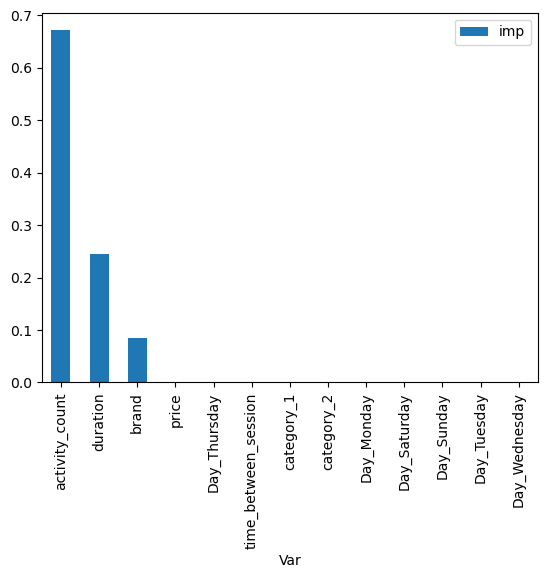

In [271]:
pd.DataFrame({'Var':X_train.columns,'imp':dt.feature_importances_}).sort_values('imp',ascending=False).plot(kind='bar',x='Var')

In [46]:
from sklearn.ensemble  import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

#### Random Forest Classifier

In [47]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [113]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.5975237532614582
Precision  : 0.6130701225637935
Recall     : 0.5852874886107514
F1 score   : 0.5988567503250656
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.58      0.61      0.60     19773
         1.0       0.61      0.59      0.60     20853

    accuracy                           0.60     40626
   macro avg       0.60      0.60      0.60     40626
weighted avg       0.60      0.60      0.60     40626



In [75]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.9968879230314794
Precision  : 0.9970663504150802
Recall     : 0.9967967384973792
F1 score   : 0.9969315262276495
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46716
         1.0       1.00      1.00      1.00     48076

    accuracy                           1.00     94792
   macro avg       1.00      1.00      1.00     94792
weighted avg       1.00      1.00      1.00     94792



In [48]:
update_performance(name = 'Random Forest Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857


#### Tuned Random Forest Classifier

In [82]:
params = {'max_features':['sqrt','log2',None],'max_depth':[3,4,5,6,7],'min_samples_split':[1,2,3],
          'min_samples_leaf' :[1,2,4,5]}

rf = RandomForestClassifier(random_state=1,n_jobs=-1)

gsc = GridSearchCV(rf,params,cv=2,scoring='recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [49]:
rfc = RandomForestClassifier(max_features=None,max_depth=5,min_samples_leaf=1,min_samples_split=2,random_state=1,n_jobs=-1)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [116]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6162309850834441
Precision  : 0.6373173277661796
Recall     : 0.5855752169951566
F1 score   : 0.6103516357183916
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62     19773
         1.0       0.64      0.59      0.61     20853

    accuracy                           0.62     40626
   macro avg       0.62      0.62      0.62     40626
weighted avg       0.62      0.62      0.62     40626



In [85]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6191239767068951
Precision  : 0.6335504885993485
Recall     : 0.5906689408436642
F1 score   : 0.6113586944821202
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.65      0.63     46716
         1.0       0.63      0.59      0.61     48076

    accuracy                           0.62     94792
   macro avg       0.62      0.62      0.62     94792
weighted avg       0.62      0.62      0.62     94792



In [50]:
update_performance(name = 'Random Forest Classifier - Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352


#### Ada Boost Classifier

In [51]:
rfc = AdaBoostClassifier(random_state=1)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [119]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6276030128489145
Precision  : 0.6775874906924795
Recall     : 0.5236656596173213
F1 score   : 0.5907652357380507
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.66     19773
         1.0       0.68      0.52      0.59     20853

    accuracy                           0.63     40626
   macro avg       0.64      0.63      0.62     40626
weighted avg       0.64      0.63      0.62     40626



In [120]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.631772723436577
Precision  : 0.6738378692289417
Recall     : 0.5309717946584575
F1 score   : 0.5939343175234704
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.74      0.66     46716
         1.0       0.67      0.53      0.59     48076

    accuracy                           0.63     94792
   macro avg       0.64      0.63      0.63     94792
weighted avg       0.64      0.63      0.63     94792



In [52]:
update_performance(name = 'AdaBoost Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352
8,AdaBoost Classifier,0.627603,0.523666,0.677587,0.590765


#### Tuned Ada Boost Classifier

In [153]:
params = {'n_estimators':[100,150,200,250,300],'learning_rate':[0.001,0.1,0.25,0.5,0.8,1.0]}

rf = AdaBoostClassifier(random_state=1)

gsc = GridSearchCV(rf,params,cv=2,scoring='recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'learning_rate': 1.0, 'n_estimators': 250}

In [53]:
rfc = AdaBoostClassifier(n_estimators=250,learning_rate=1.0,random_state=1)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [123]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6304090976222124
Precision  : 0.6788383776497978
Recall     : 0.5313384165347912
F1 score   : 0.5960995292535307
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.73      0.66     19773
         1.0       0.68      0.53      0.60     20853

    accuracy                           0.63     40626
   macro avg       0.64      0.63      0.63     40626
weighted avg       0.64      0.63      0.63     40626



In [86]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6354122710777281
Precision  : 0.6764583006945533
Recall     : 0.5388759464181713
F1 score   : 0.5998795933961609
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.67     46716
         1.0       0.68      0.54      0.60     48076

    accuracy                           0.64     94792
   macro avg       0.64      0.64      0.63     94792
weighted avg       0.64      0.64      0.63     94792



In [54]:
update_performance(name = 'AdaBoost Classifier -Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352
8,AdaBoost Classifier,0.627603,0.523666,0.677587,0.590765
9,Random Forest Classifier -Tuned,0.630409,0.531338,0.678838,0.596100


In [66]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352
8,AdaBoost Classifier,0.627603,0.523666,0.677587,0.590765
9,AdaBoost Classifier -Tuned,0.630409,0.531338,0.678838,0.596100


#### Gradient Boost Classifier

In [67]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [126]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.632649042485108
Precision  : 0.6857805351883186
Recall     : 0.5247686184242075
F1 score   : 0.5945666938331975
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.66     19773
         1.0       0.69      0.52      0.59     20853

    accuracy                           0.63     40626
   macro avg       0.64      0.64      0.63     40626
weighted avg       0.64      0.63      0.63     40626



In [158]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.636203477086674
Precision  : 0.6814795032714648
Recall     : 0.5307845910641484
F1 score   : 0.5967657066685375
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.74      0.67     46716
         1.0       0.68      0.53      0.60     48076

    accuracy                           0.64     94792
   macro avg       0.64      0.64      0.63     94792
weighted avg       0.64      0.64      0.63     94792



In [68]:
update_performance(name = 'Gradient Boost Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352
8,AdaBoost Classifier,0.627603,0.523666,0.677587,0.590765
9,AdaBoost Classifier -Tuned,0.630409,0.531338,0.678838,0.596100


#### Tuned Gradient Boost Classifier

In [88]:
params = {'max_depth':[5,6,7],'min_samples_split': [2,3,4,5],
          'min_samples_leaf' :[1,2,3,4],'learning_rate':[0.01,0.1,0.15,0.5,1]}

gb = GradientBoostingClassifier(random_state=1)

gsc = GridSearchCV(gb,params,cv=2,scoring='recall',n_jobs=-1)
gsc.fit(X_train,y_train)

gsc.best_params_

{'learning_rate': 1,
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [69]:
gbc = GradientBoostingClassifier(learning_rate=1,max_depth=7,min_samples_leaf=2,min_samples_split=2,random_state=1)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [90]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6054250972283759
Precision  : 0.6334901743703294
Recall     : 0.5487939385220352
F1 score   : 0.5881083303355774
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.58      0.67      0.62     19773
         1.0       0.63      0.55      0.59     20853

    accuracy                           0.61     40626
   macro avg       0.61      0.61      0.60     40626
weighted avg       0.61      0.61      0.60     40626



In [91]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.7580703012912482
Precision  : 0.8013230747105774
Recall     : 0.6953989516598719
F1 score   : 0.7446128489815919
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.72      0.82      0.77     46716
         1.0       0.80      0.70      0.74     48076

    accuracy                           0.76     94792
   macro avg       0.76      0.76      0.76     94792
weighted avg       0.76      0.76      0.76     94792



In [70]:
update_performance(name = 'Gradient Boost Classifier -Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352
8,AdaBoost Classifier,0.627603,0.523666,0.677587,0.590765
9,AdaBoost Classifier -Tuned,0.630409,0.531338,0.678838,0.596100


#### XG Boost Classifier

In [72]:
from xgboost import XGBClassifier

In [73]:
gbc = XGBClassifier(random_state=1)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [133]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6290552847929897
Precision  : 0.6770992833956023
Recall     : 0.5301395482664365
F1 score   : 0.5946745562130178
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.73      0.66     19773
         1.0       0.68      0.53      0.59     20853

    accuracy                           0.63     40626
   macro avg       0.64      0.63      0.63     40626
weighted avg       0.64      0.63      0.63     40626



In [99]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.6733901595071314
Precision  : 0.724902764637864
Recall     : 0.5737582161577502
F1 score   : 0.6405350176481516
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70     46716
         1.0       0.72      0.57      0.64     48076

    accuracy                           0.67     94792
   macro avg       0.68      0.67      0.67     94792
weighted avg       0.68      0.67      0.67     94792



In [74]:
update_performance(name = 'XGBoost Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352
8,AdaBoost Classifier,0.627603,0.523666,0.677587,0.590765
9,AdaBoost Classifier -Tuned,0.630409,0.531338,0.678838,0.596100


#### Tuned XG Boost Classifier

In [153]:
params = {'max_depth':range(1,10),
        'gamma': range(1,10),
        
        'reg_lambda' : [0.1,0.2,0.3,1],
        'min_child_weight' :[0,1,2,3],'learning_rate':[0.01,0.1,0.15,0.5,1]}

xg = XGBClassifier(random_state=1,n_jobs=-1)

gsc = GridSearchCV(xg,params,cv=2,scoring='recall',n_jobs=-1)
gsc.fit(X_train,y_train)

gsc.best_params_

{'gamma': 8,
 'learning_rate': 1,
 'max_depth': 3,
 'min_child_weight': 0,
 'reg_lambda': 1}

In [75]:
gbc = XGBClassifier(max_depth = 3,gamma = 8 ,reg_lambda= 1,learning_rate=1,min_child_weight=0,random_state=1)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [136]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6307537045241963
Precision  : 0.6754827875734677
Recall     : 0.5401141322591474
F1 score   : 0.6002611453087111
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.73      0.66     19773
         1.0       0.68      0.54      0.60     20853

    accuracy                           0.63     40626
   macro avg       0.64      0.63      0.63     40626
weighted avg       0.64      0.63      0.63     40626



In [157]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.6335977719638788
Precision  : 0.6704388698717622
Recall     : 0.545906481404443
F1 score   : 0.6017977115865264
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.72      0.66     46716
         1.0       0.67      0.55      0.60     48076

    accuracy                           0.63     94792
   macro avg       0.64      0.63      0.63     94792
weighted avg       0.64      0.63      0.63     94792



In [76]:
update_performance(name = 'XGBoost Classifier -Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.587235,0.444876,0.641120,0.525267
1,Naive bayes-Guassian,0.619948,0.497626,0.676423,0.573410
2,KNeighbors Classifier,0.586299,0.562701,0.604160,0.582694
3,KNeighbors Classifier - Tuned,0.568798,0.570374,0.581528,0.575897
4,Decision Tree Classifier,0.569340,0.575313,0.581334,0.578308
5,Decision Tree Classifier-Tuned,0.612810,0.605381,0.627280,0.616135
6,Random Forest Classifier,0.597524,0.585287,0.613070,0.598857
7,Random Forest Classifier - Tuned,0.616231,0.585575,0.637317,0.610352
8,AdaBoost Classifier,0.627603,0.523666,0.677587,0.590765
9,AdaBoost Classifier -Tuned,0.630409,0.531338,0.678838,0.596100


### For Returing Users

In [148]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

# create an empty dataframe to store the scores for various algorithms
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

def per_measures(test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    
    
    return (accuracy,recall,precision,f1score)

In [149]:
def update_performance (name,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score._append({'Model'       : name,
                                    'Accuracy'    : per_measures(test,pred)[0],
                                    'Recall'      : per_measures(test,pred)[1],
                                    'Precision'   : per_measures(test,pred)[2],
                                    'F1 Score'    : per_measures(test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [138]:
X_train, X_test, y_train, y_test =train_test_split(features_2,abandoned_2,test_size=0.3,random_state=1)

In [139]:
import statsmodels.api as sma
X_train_log = sma.add_constant(X_train)
X_test_log = sma.add_constant(X_test)

logreg = sma.Logit(y_train,X_train_log).fit()
print(logreg.summary())

ypred = logreg.predict(X_test_log)

Optimization terminated successfully.
         Current function value: 0.684408
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           is_purchased   No. Observations:               287826
Model:                          Logit   Df Residuals:                   287812
Method:                           MLE   Df Model:                           13
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                 0.01255
Time:                        20:08:30   Log-Likelihood:            -1.9699e+05
converged:                       True   LL-Null:                   -1.9949e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4717      0.014     34.516      0.000       0.445       0.498

In [140]:
pd.DataFrame(np.exp(logreg.params)).reset_index().rename(columns={'index':'Variable',0:'Odds'}).sort_values('Odds',ascending=False)

,Variable,Odds
0,const,1.602650
3,category_1,1.051941
6,time_between_session,1.041147
2,price,1.039315
12,Day_Tuesday,0.991334
9,Day_Saturday,0.989463
10,Day_Sunday,0.960561
5,activity_count,0.939293
7,duration,0.927318
8,Day_Monday,0.900577


In [141]:
fpr,tpr,threshold = metrics.roc_curve(y_test,ypred)

In [142]:
df = pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':threshold})

In [143]:
df['difference'] = df.tpr - df.fpr

In [144]:
df[df.difference == df.difference.max()]

,fpr,tpr,threshold,difference
26160,0.372197,0.502289,0.500516,0.130093


In [145]:
y_pred = [0 if x < 0.502289 else 1 for x in ypred]

In [146]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, y_pred))
print("Precision  :",metrics.precision_score(y_test, y_pred))
print("Recall     :",metrics.recall_score(y_test, y_pred))
print("F1 score   :",metrics.f1_score(y_test, y_pred))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, y_pred))

The Evaluation metrics for Test Data

Accuracy   : 0.5654006728547688
Precision  : 0.5714881358502009
Recall     : 0.49308303626909117
F1 score   : 0.5293983391562352
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.56      0.64      0.60     62201
         1.0       0.57      0.49      0.53     61154

    accuracy                           0.57    123355
   macro avg       0.57      0.56      0.56    123355
weighted avg       0.57      0.57      0.56    123355



In [147]:
print("The Evaluation metrics for Training Data:")
print()
ypred_train = logreg.predict(X_train_log)
ypred_train = [0 if x< 0.502289 else 1 for x in ypred_train]
print("Accuracy  :",metrics.accuracy_score(y_train, ypred_train))
print("Precision :",metrics.precision_score(y_train, ypred_train))
print("Recall    :",metrics.recall_score(y_train, ypred_train))
print("F1 score  :",metrics.f1_score(y_train, ypred_train))

print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_train))

The Evaluation metrics for Training Data:

Accuracy  : 0.5614398977159811
Precision : 0.5669388522432832
Recall    : 0.48637523841579716
F1 score  : 0.5235760574596813
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.56      0.64      0.59    145218
         1.0       0.57      0.49      0.52    142608

    accuracy                           0.56    287826
   macro avg       0.56      0.56      0.56    287826
weighted avg       0.56      0.56      0.56    287826



In [150]:
update_performance(name = 'Logistic Regression',
                   test = y_test,
                   pred = y_pred)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398


In [151]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [152]:
gb = GaussianNB()

gb.fit(X_train,y_train)

ypred_gb = gb.predict(X_test)
ypred_gb
ypred_dt_train = gb.predict(X_train)

In [153]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_gb))
print("Precision  :",metrics.precision_score(y_test, ypred_gb))
print("Recall     :",metrics.recall_score(y_test, ypred_gb))
print("F1 score   :",metrics.f1_score(y_test, ypred_gb))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_gb))

The Evaluation metrics for Test Data

Accuracy   : 0.606007052815046
Precision  : 0.6277191054677167
Recall     : 0.5044314353926154
F1 score   : 0.5593624486613417
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.59      0.71      0.64     62201
         1.0       0.63      0.50      0.56     61154

    accuracy                           0.61    123355
   macro avg       0.61      0.61      0.60    123355
weighted avg       0.61      0.61      0.60    123355



In [195]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6027634751551284
Precision  : 0.623634566778321
Recall     : 0.5000210366879838
F1 score   : 0.5550284297662181
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64    145218
         1.0       0.62      0.50      0.56    142608

    accuracy                           0.60    287826
   macro avg       0.61      0.60      0.60    287826
weighted avg       0.61      0.60      0.60    287826



In [154]:
update_performance(name = 'Naive bayes-Guassian',
                   test = y_test,
                   pred = ypred_gb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362


In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
ypred_kn = kn.predict(X_test)
ypred_dt_train = kn.predict(X_train)

In [157]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_kn))
print("Precision  :",metrics.precision_score(y_test, ypred_kn))
print("Recall     :",metrics.recall_score(y_test, ypred_kn))
print("F1 score   :",metrics.f1_score(y_test, ypred_kn))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_kn))

The Evaluation metrics for Test Data

Accuracy   : 0.5826192695877751
Precision  : 0.5852406982895433
Recall     : 0.5427118422343592
F1 score   : 0.5631745062105477
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60     62201
         1.0       0.59      0.54      0.56     61154

    accuracy                           0.58    123355
   macro avg       0.58      0.58      0.58    123355
weighted avg       0.58      0.58      0.58    123355



In [191]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.7308790727731338
Precision  : 0.7443624251699149
Recall     : 0.6957884550656345
F1 score   : 0.7192562792214853
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74    145218
         1.0       0.74      0.70      0.72    142608

    accuracy                           0.73    287826
   macro avg       0.73      0.73      0.73    287826
weighted avg       0.73      0.73      0.73    287826



In [158]:
update_performance(name = 'KNeighbors Classifier',
                   test = y_test,
                   pred = ypred_kn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175


In [192]:
from sklearn.model_selection import GridSearchCV

In [178]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,5),'p':[1,2],
         }

knn = KNeighborsClassifier()

gsc = GridSearchCV(knn,params,cv = 2,scoring = 'recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'n_neighbors': 1, 'p': 1}

In [159]:
kn = KNeighborsClassifier(n_neighbors=1,p=1,n_jobs=-1)
kn.fit(X_train,y_train)
ypred_kn = kn.predict(X_test)
ypred_dt_train = kn.predict(X_train)

In [160]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_kn))
print("Precision  :",metrics.precision_score(y_test, ypred_kn))
print("Recall     :",metrics.recall_score(y_test, ypred_kn))
print("F1 score   :",metrics.f1_score(y_test, ypred_kn))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_kn))

The Evaluation metrics for Test Data

Accuracy   : 0.5699160958210044
Precision  : 0.5669958153459369
Recall     : 0.5605520489256631
F1 score   : 0.5637555195579421
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.57      0.58      0.58     62201
         1.0       0.57      0.56      0.56     61154

    accuracy                           0.57    123355
   macro avg       0.57      0.57      0.57    123355
weighted avg       0.57      0.57      0.57    123355



In [199]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.9992599695649454
Precision  : 0.9992216916636867
Recall     : 0.9992847526085493
F1 score   : 0.9992532211412043
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    145218
         1.0       1.00      1.00      1.00    142608

    accuracy                           1.00    287826
   macro avg       1.00      1.00      1.00    287826
weighted avg       1.00      1.00      1.00    287826



In [161]:
update_performance(name = 'KNeighbors Classifier - Tuned',
                   test = y_test,
                   pred = ypred_kn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756


In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train,y_train)

ypred_dt = dt.predict(X_test)
ypred_dt_train = dt.predict(X_train)

In [164]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.5692837744720523
Precision  : 0.5654607463977416
Recall     : 0.566635052490434
F1 score   : 0.5660472903989873
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57     62201
         1.0       0.57      0.57      0.57     61154

    accuracy                           0.57    123355
   macro avg       0.57      0.57      0.57    123355
weighted avg       0.57      0.57      0.57    123355



In [223]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.9992599695649454
Precision  : 1.0
Recall     : 0.9985063951531471
F1 score   : 0.9992526394459006
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    145218
         1.0       1.00      1.00      1.00    142608

    accuracy                           1.00    287826
   macro avg       1.00      1.00      1.00    287826
weighted avg       1.00      1.00      1.00    287826



In [165]:
update_performance(name = 'Decision Tree Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047


In [218]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':range(1,20),'min_samples_split': range(1,15),
          'min_samples_leaf' :range(1,10)
         }

dt = DecisionTreeClassifier(random_state=1)

gsc = GridSearchCV(dt,params,cv = 2,scoring = 'recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 14}

In [166]:
dt = DecisionTreeClassifier(max_depth=11,min_samples_leaf=1,min_samples_split=14,random_state=1)

dt.fit(X_train,y_train)

ypred_dt = dt.predict(X_test)
ypred_dt_train = dt.predict(X_train)

In [167]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6229419156094199
Precision  : 0.6602811104299852
Recall     : 0.4931647970696929
F1 score   : 0.5646166807076664
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67     62201
         1.0       0.66      0.49      0.56     61154

    accuracy                           0.62    123355
   macro avg       0.63      0.62      0.62    123355
weighted avg       0.63      0.62      0.62    123355



In [262]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6341921855565515
Precision  : 0.6747356888010713
Recall     : 0.505252159766633
F1 score   : 0.5778223300386935
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.76      0.68    145218
         1.0       0.67      0.51      0.58    142608

    accuracy                           0.63    287826
   macro avg       0.64      0.63      0.63    287826
weighted avg       0.64      0.63      0.63    287826



In [168]:
update_performance(name = 'Decision Tree Classifier-Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617


In [111]:
from sklearn.ensemble  import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [169]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [170]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6119330387904828
Precision  : 0.6199090121317158
Recall     : 0.5615004742126435
F1 score   : 0.5892608926947299
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63     62201
         1.0       0.62      0.56      0.59     61154

    accuracy                           0.61    123355
   macro avg       0.61      0.61      0.61    123355
weighted avg       0.61      0.61      0.61    123355



In [187]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.9992599695649454
Precision  : 0.9993547436859566
Recall     : 0.9991515202513183
F1 score   : 0.9992531216359791
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    145218
         1.0       1.00      1.00      1.00    142608

    accuracy                           1.00    287826
   macro avg       1.00      1.00      1.00    287826
weighted avg       1.00      1.00      1.00    287826



In [171]:
update_performance(name = 'Random Forest Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261


In [228]:
params = {'max_depth':[3,4,5,6,7],'min_samples_split':[1,2,3],
          'min_samples_leaf' :[1,2,4,5]}

rf = RandomForestClassifier(random_state=1)

gsc = GridSearchCV(rf,params,cv=2,scoring='recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [172]:
rfc = RandomForestClassifier(max_depth=7,min_samples_leaf=4,min_samples_split=2,random_state=42)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [230]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6224393012038426
Precision  : 0.6589135457993635
Recall     : 0.49427674395787685
F1 score   : 0.5648428448630265
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67     62201
         1.0       0.66      0.49      0.56     61154

    accuracy                           0.62    123355
   macro avg       0.63      0.62      0.62    123355
weighted avg       0.63      0.62      0.62    123355



In [231]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6215942965541681
Precision  : 0.6574983872928022
Recall     : 0.49315606417592284
F1 score   : 0.5635911223659802
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67    145218
         1.0       0.66      0.49      0.56    142608

    accuracy                           0.62    287826
   macro avg       0.63      0.62      0.61    287826
weighted avg       0.63      0.62      0.62    287826



In [173]:
update_performance(name = 'Random Forest Classifier - Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261
7,Random Forest Classifier - Tuned,0.622439,0.494277,0.658914,0.564843


In [174]:
rfc = AdaBoostClassifier(random_state=42)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [233]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6246524259251753
Precision  : 0.6584658060386216
Recall     : 0.5046113091539393
F1 score   : 0.5713624454956999
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.74      0.67     62201
         1.0       0.66      0.50      0.57     61154

    accuracy                           0.62    123355
   macro avg       0.63      0.62      0.62    123355
weighted avg       0.63      0.62      0.62    123355



In [234]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6206597041267988
Precision  : 0.652802413824632
Recall     : 0.5006521373274991
F1 score   : 0.5666923302828025
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.74      0.66    145218
         1.0       0.65      0.50      0.57    142608

    accuracy                           0.62    287826
   macro avg       0.63      0.62      0.61    287826
weighted avg       0.63      0.62      0.62    287826



In [175]:
update_performance(name = 'AdaBoost Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261
7,Random Forest Classifier - Tuned,0.622439,0.494277,0.658914,0.564843
8,AdaBoost Classifier,0.624652,0.504611,0.658466,0.571362


In [237]:
params = {'n_estimators':[100,150,200,250,300],'learning_rate':[0.001,0.1,0.25,0.5,0.8,1.0]}

rf = AdaBoostClassifier(random_state=1)

gsc = GridSearchCV(rf,params,cv=2,scoring='recall',n_jobs=-1)

gsc.fit(X_train,y_train)

gsc.best_params_

{'learning_rate': 1.0, 'n_estimators': 300}

In [176]:
rfc = AdaBoostClassifier(n_estimators=300,learning_rate=1.0,random_state=42)

rfc.fit(X_train,y_train)

ypred_dt = rfc.predict(X_test)
ypred_dt_train = rfc.predict(X_train)

In [239]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6258035750476267
Precision  : 0.6568284979187148
Recall     : 0.51347417993917
F1 score   : 0.5763713622305229
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.74      0.66     62201
         1.0       0.66      0.51      0.58     61154

    accuracy                           0.63    123355
   macro avg       0.63      0.62      0.62    123355
weighted avg       0.63      0.63      0.62    123355



In [240]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train))

The Evaluation metrics for Train Data

Accuracy   : 0.6241722429523393
Precision  : 0.6542385939137679
Recall     : 0.512117132278694
F1 score   : 0.5745190511215913
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.66    145218
         1.0       0.65      0.51      0.57    142608

    accuracy                           0.62    287826
   macro avg       0.63      0.62      0.62    287826
weighted avg       0.63      0.62      0.62    287826



In [177]:
update_performance(name = 'AdaBoost Classifier -Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261
7,Random Forest Classifier - Tuned,0.622439,0.494277,0.658914,0.564843
8,AdaBoost Classifier,0.624652,0.504611,0.658466,0.571362
9,AdaBoost Classifier -Tuned,0.625804,0.513474,0.656828,0.576371


In [178]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [179]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.627854566089741
Precision  : 0.6597586019026864
Recall     : 0.5148477613892796
F1 score   : 0.5783643778243139
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.74      0.67     62201
         1.0       0.66      0.51      0.58     61154

    accuracy                           0.63    123355
   macro avg       0.63      0.63      0.62    123355
weighted avg       0.63      0.63      0.62    123355



In [243]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.6270003404834865
Precision  : 0.6578676292759829
Recall     : 0.5150131829911365
F1 score   : 0.5777407187442231
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.74      0.67    145218
         1.0       0.66      0.52      0.58    142608

    accuracy                           0.63    287826
   macro avg       0.63      0.63      0.62    287826
weighted avg       0.63      0.63      0.62    287826



In [180]:
update_performance(name = 'Gradient Boost Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261
7,Random Forest Classifier - Tuned,0.622439,0.494277,0.658914,0.564843
8,AdaBoost Classifier,0.624652,0.504611,0.658466,0.571362
9,AdaBoost Classifier -Tuned,0.625804,0.513474,0.656828,0.576371


In [245]:
params = {'max_depth':[5,6,7],'min_samples_split': [2,3,4,5],
          'min_samples_leaf' :[1,2,3,4]}

gb = GradientBoostingClassifier(random_state=1)

gsc = GridSearchCV(gb,params,cv=2,scoring='recall',n_jobs=-1)
gsc.fit(X_train,y_train)

gsc.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [181]:
gbc = GradientBoostingClassifier(max_depth=7,min_samples_split=4,min_samples_leaf=1,random_state=1)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [247]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.632986097037007
Precision  : 0.6614218048016913
Recall     : 0.5320338816757694
F1 score   : 0.5897140785717522
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.67     62201
         1.0       0.66      0.53      0.59     61154

    accuracy                           0.63    123355
   macro avg       0.64      0.63      0.63    123355
weighted avg       0.64      0.63      0.63    123355



In [248]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.6464009505743054
Precision  : 0.6781466777191222
Recall     : 0.544983451138786
F1 score   : 0.6043162670627067
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.63      0.75      0.68    145218
         1.0       0.68      0.54      0.60    142608

    accuracy                           0.65    287826
   macro avg       0.65      0.65      0.64    287826
weighted avg       0.65      0.65      0.64    287826



In [182]:
update_performance(name = 'Gradient Boost Classifier -Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261
7,Random Forest Classifier - Tuned,0.622439,0.494277,0.658914,0.564843
8,AdaBoost Classifier,0.624652,0.504611,0.658466,0.571362
9,AdaBoost Classifier -Tuned,0.625804,0.513474,0.656828,0.576371


In [183]:
from xgboost import XGBClassifier

In [184]:
gbc = XGBClassifier(random_state=42)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [251]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6322078553767582
Precision  : 0.660733560067613
Recall     : 0.530529482944697
F1 score   : 0.5885159218915806
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.67     62201
         1.0       0.66      0.53      0.59     61154

    accuracy                           0.63    123355
   macro avg       0.64      0.63      0.63    123355
weighted avg       0.64      0.63      0.63    123355



In [252]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.6503651511677194
Precision  : 0.683684007842039
Recall     : 0.5477602939526535
F1 score   : 0.6082206926622649
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.63      0.75      0.68    145218
         1.0       0.68      0.55      0.61    142608

    accuracy                           0.65    287826
   macro avg       0.66      0.65      0.65    287826
weighted avg       0.66      0.65      0.65    287826



In [185]:
update_performance(name = 'XGBoost Classifier',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261
7,Random Forest Classifier - Tuned,0.622439,0.494277,0.658914,0.564843
8,AdaBoost Classifier,0.624652,0.504611,0.658466,0.571362
9,AdaBoost Classifier -Tuned,0.625804,0.513474,0.656828,0.576371


<Axes: xlabel='Var'>

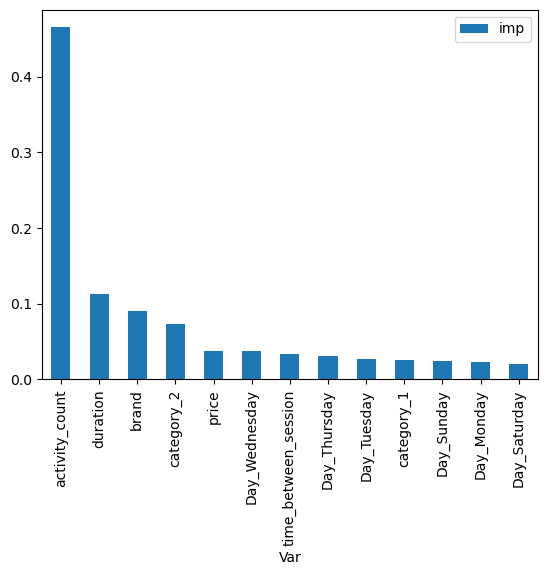

In [273]:
pd.DataFrame({'Var':X_train.columns,'imp':gbc.feature_importances_}).sort_values('imp',ascending=False).plot(kind='bar',x='Var')

In [255]:
params = {'max_depth':[1,2,3,4],
        'gamma': [1,2,3],
        
        'reg_lambda' : [0.1,0.2,1],
        'learning_rate':[0.01,0.1,0.5,1]}

xg = XGBClassifier(random_state=1,n_jobs=-1)

gsc = GridSearchCV(xg,params,cv=2,scoring='recall',n_jobs=-1)
gsc.fit(X_train,y_train)

gsc.best_params_

{'gamma': 3, 'learning_rate': 1, 'max_depth': 2, 'reg_lambda': 0.1}

In [186]:
gbc = XGBClassifier(max_depth = 2,gamma = 8 ,reg_lambda= 0.1,learning_rate=1,random_state=1)

gbc.fit(X_train,y_train)

ypred_dt = gbc.predict(X_test)
ypred_dt_train1 = gbc.predict(X_train)

In [258]:
print("The Evaluation metrics for Test Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_test, ypred_dt))
print("Precision  :",metrics.precision_score(y_test, ypred_dt))
print("Recall     :",metrics.recall_score(y_test, ypred_dt))
print("F1 score   :",metrics.f1_score(y_test, ypred_dt))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_test, ypred_dt))

The Evaluation metrics for Test Data

Accuracy   : 0.6269466174861174
Precision  : 0.6545941087551579
Recall     : 0.5240049710566765
F1 score   : 0.5820648817524612
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.66     62201
         1.0       0.65      0.52      0.58     61154

    accuracy                           0.63    123355
   macro avg       0.63      0.63      0.62    123355
weighted avg       0.63      0.63      0.62    123355



In [259]:
print("The Evaluation metrics for Train Data")
print()
print("Accuracy   :",metrics.accuracy_score(y_train, ypred_dt_train1))
print("Precision  :",metrics.precision_score(y_train, ypred_dt_train1))
print("Recall     :",metrics.recall_score(y_train, ypred_dt_train1))
print("F1 score   :",metrics.f1_score(y_train, ypred_dt_train1))
print('-'*50)
print("The Classification report")
print(metrics.classification_report(y_train, ypred_dt_train1))

The Evaluation metrics for Train Data

Accuracy   : 0.6252492825526533
Precision  : 0.6516017557791488
Recall     : 0.5235961516885448
F1 score   : 0.5806276025365374
--------------------------------------------------
The Classification report
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.66    145218
         1.0       0.65      0.52      0.58    142608

    accuracy                           0.63    287826
   macro avg       0.63      0.62      0.62    287826
weighted avg       0.63      0.63      0.62    287826



In [187]:
update_performance(name = 'XGBoost Classifier -Tuned',
                   test = y_test,
                   pred = ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.565401,0.493083,0.571488,0.529398
1,Naive bayes-Guassian,0.606007,0.504431,0.627719,0.559362
2,KNeighbors Classifier,0.582619,0.542712,0.585241,0.563175
3,KNeighbors Classifier - Tuned,0.569916,0.560552,0.566996,0.563756
4,Decision Tree Classifier,0.569284,0.566635,0.565461,0.566047
5,Decision Tree Classifier-Tuned,0.622942,0.493165,0.660281,0.564617
6,Random Forest Classifier,0.611933,0.561500,0.619909,0.589261
7,Random Forest Classifier - Tuned,0.622439,0.494277,0.658914,0.564843
8,AdaBoost Classifier,0.624652,0.504611,0.658466,0.571362
9,AdaBoost Classifier -Tuned,0.625804,0.513474,0.656828,0.576371
